In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pyfits as pf
import numpy as np
import cosmolopy.distance as cd
from astropy.stats import median_absolute_deviation
%pylab inline

/software/local/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
sample = h5py.File("red_photometric_sample_v2ij_auto.h5" , "r")
lrg_dense = h5py.File("LRG_lmin_0.5_nbar_0.001_auto_v2.h5" , "r")
lrg_lum = h5py.File("LRG_lmin_1.0_nbar_0.0002_auto_v2.h5" , "r")
reduced_kids = h5py.File("reduced_kids_auto.h5" , "r")
bright_sample = pf.open("KiDS_DR3_GAMA-like_rAUTOless20.3_NOMASKING_forMV.fits")

In [3]:
ID_kids = reduced_kids['ID'][:28158450]
mi = reduced_kids['mi'][:28158450]
z_ann = reduced_kids['redshift'][:28158450]
colors = reduced_kids['colors'][:28158450]
color_errs = reduced_kids['color_errs'][:28158450]
z_bpz = reduced_kids['BPZ'][:28158450]
RA = reduced_kids['RA'][:28158450]
DEC = reduced_kids['DEC'][:28158450]

In [4]:
bright_z_ann = bright_sample[1].data['zphot_ANNz2']
bright_z_ID = bright_sample[1].data['ID']

In [5]:
spec_kids = h5py.File("reduced_speckids_auto.h5" , 'r')

In [121]:
def dflens():
    fname = 'KiDS_DR3_x_2dFLenS.txt'
    with open(fname) as f:
        
         lines = f.readlines()
            
    ID_2df , z_2df , mi_2df , qual_2df = [] , [] , [] , []
    for i in range(1,len(lines)):
        
     if (lines[i].split()[:200][-26]!='""'):  
        ID_2df.append('KIDS '+lines[i].split()[:200][1].replace('"',''))
        z_2df.append(lines[i].split()[:200][-3])
        mi_2df.append(lines[i].split()[:200][-50].replace('"',''))
        qual_2df.append(lines[i].split()[:200][-2])
    #print z_2df
    #print mi_2df
    z_2df = np.array(z_2df ,dtype = float)
    ID_2df = np.array(ID_2df)
    mi_2df = np.array(mi_2df)
    qual_2df = np.array(qual_2df, dtype = float)
    
    mask = (mi_2df!='')&(mi_2df!='nan')&(qual_2df==4.)&(mi_2df<22)
    
    ID_2df = ID_2df[mask]
    z_2df = z_2df[mask]
    qual_2df = qual_2df[mask]
    mi_2df = mi_2df[mask]
    
    mi_2df = np.array(mi_2df, dtype= float)
     
    return ID_2df , z_2df, mi_2df, qual_2df

ID_2df , z_2df , mi_2df , qual_2df = dflens()

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error


In [122]:
ID_2df , z_2df , mi_2df , qual_2df = ID_2df , z_2df , mi_2df , qual_2df

In [8]:
ID_spec = spec_kids["ID"][:]
z_spec = spec_kids["redshift"][:]
mi_spec = spec_kids["mi"][:]
RA_spec = spec_kids["RA"][:]
DEC_spec = spec_kids["DEC"][:]

mask = np.where(np.in1d(ID_2df , ID_spec)==False)[0]
ID_2df, z_2df, mi_2df = ID_2df[mask], z_2df[mask], mi_2df[mask]

In [9]:
colors_spec = spec_kids["colors"][:]

Text(0.5,0,u'$z$')

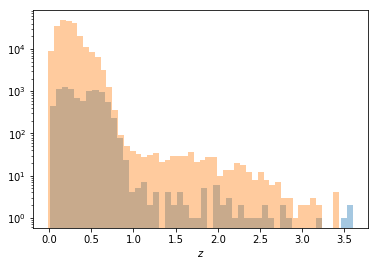

In [10]:
sns.distplot(z_2df , kde = False)
sns.distplot(z_spec , kde = False)
plt.yscale("log")
plt.xlabel("$z$")

In [125]:
ID_specall = np.hstack([ID_spec, ID_2df])
z_specall = np.hstack([z_spec, z_2df])
mi_specall = np.hstack([mi_spec, mi_2df])

ID_specall , spec_index = np.unique(ID_specall , return_index = True)
z_specall = z_specall[spec_index]
mi_specall = mi_specall[spec_index]

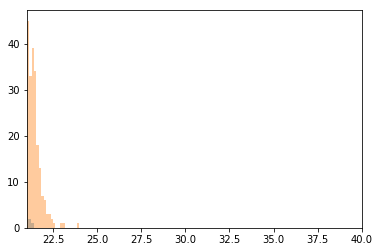

(0.5, 1.0)

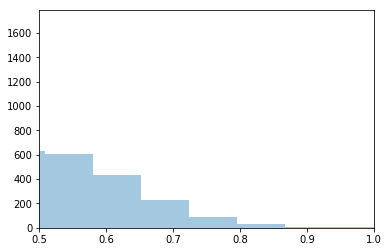

In [124]:
sns.distplot(mi_2df[mi_2df>21] , kde = False)
sns.distplot(mi_spec[mi_spec>21] , kde= False)
plt.xlim(21,40)
#plt.ylim(0,1000)
plt.show()
plt.close()
sns.distplot(z_2df , kde = False)
plt.xlim(0.5,1.0)

#plt.xlim(20.5,22)
#plt.ylim(0,1000)

In [13]:
#z_dense.shape[0]/54.
z_lum.shape[0]/27.
#54 * 3619

NameError: name 'z_lum' is not defined

In [21]:
z_dense = lrg_dense["redshift"][:]
ID_dense = lrg_dense["ID"][:]
mi_dense = lrg_dense["mi"][:]
colors_dense = lrg_dense["colors"][:]

z_lum = lrg_lum["redshift"][:]
ID_lum = lrg_lum["ID"][:]
mi_lum = lrg_lum["mi"][:]
colors_lum = lrg_lum["colors"][:]

['KIDS J000000.37-312726.61' 'KIDS J000000.42-325530.01'
 'KIDS J000000.81-325414.70' ... 'KIDS J235959.34-325618.19'
 'KIDS J235959.37-325611.89' 'KIDS J235959.67-333022.56']
[20.283745 20.297638 20.78434  ... 20.012848 19.99771  20.042599]


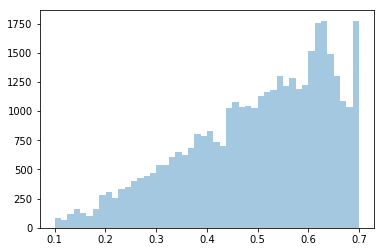

In [22]:
print ID_dense
print mi_lum
sns.distplot(z_lum , kde = False)
#sns.distplot(z_lum , kde = False)

In [16]:
def vc(z):
    '''
    dv/dz to impose uniformity
    in redshift
    '''
    cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':1.0}

    return cd.comoving_volume(z,**cosmo)

In [106]:
def red_spec_dist_dense():
    
    lrg_spec_mask = np.where((np.in1d(ID_specall , ID_dense)==True))#&(z_specall>0.1)&(z_specall<0.7))
    
    plt.figure(figsize=(10,10))
    
    sns.distplot(z_dense , kde = False , bins = 50 , hist_kws={"histtype": "step", "linewidth": 6, 
                                                               "alpha" : 1.0, "label":"dense sample"})
    sns.distplot(z_specall[lrg_spec_mask], 
                 kde = False , bins =50,hist_kws={"histtype": "step", "linewidth": 6, 
                                                  "alpha" : 1.0, "label":"dense sample with specz"})
    
    ztest = np.linspace(0.1, 0.7 , 50)
    bins = .5*(ztest[1:]+ztest[:-1])
    dvbin = vc(ztest[1:]) - vc(ztest[:-1])
    dvbin = dvbin * 360.3 / (41252.96)
    nbar = 0.001
    plt.plot(bins , nbar * dvbin, lw = 4, label = "constant comoving density")
    plt.legend(loc="best" , fontsize = 15)
    plt.xlim((0.05,0.75))
    #plt.ylim((0.5,24000))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$dN/dz_{red}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

def red_spec_dist_lum():
    
    lrg_spec_mask = np.where((np.in1d(ID_specall , ID_lum)==True))#&(z_specall>0.1)&(z_specall<0.7))
    
    plt.figure(figsize=(10,10))
    
    sns.distplot(z_lum , kde = False , bins = 30 , hist_kws={"histtype": "step", "linewidth": 6, 
                                                               "alpha" : 1.0, "label":"luminous sample"})
    sns.distplot(z_specall[lrg_spec_mask], 
                 kde = False , bins =30,hist_kws={"histtype": "step", "linewidth": 6, 
                                                  "alpha" : 1.0, "label":"luminous sample with specz"})
    
    ztest = np.linspace(0.1, 0.7 ,30)
    bins = .5*(ztest[1:]+ztest[:-1])
    dvbin = vc(ztest[1:]) - vc(ztest[:-1])
    dvbin = dvbin * 360.3 / (41252.96)
    nbar = 0.0002
    plt.plot(bins , nbar * dvbin, lw = 4, label = "constant comoving density")
    plt.legend(loc="best" , fontsize = 15)
    plt.xlim((0.05,0.75))
    #plt.ylim((0.5,4800))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$dN/dz_{red}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

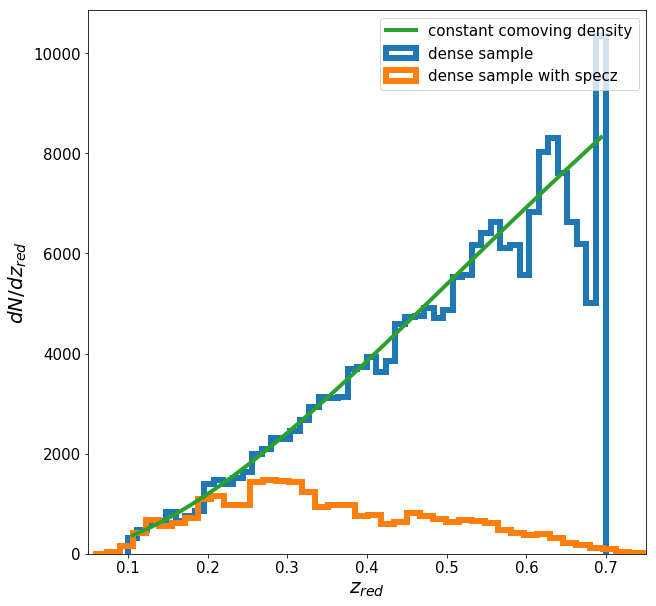

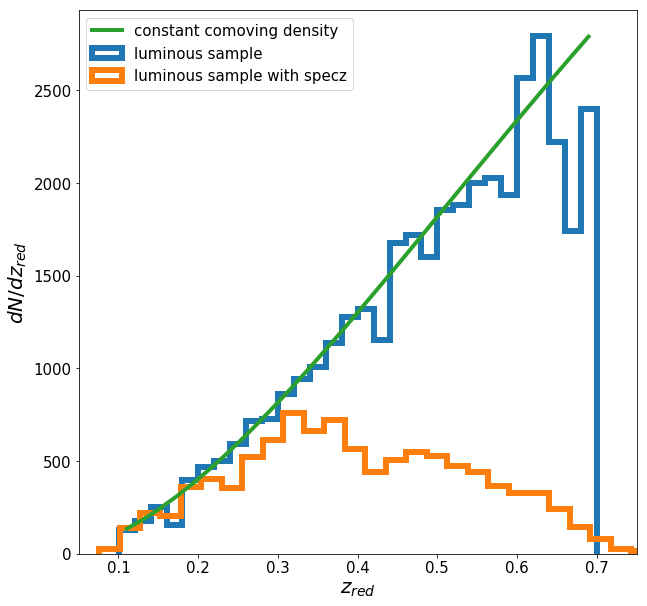

In [107]:
red_spec_dist_dense()
red_spec_dist_lum()

In [108]:
import corner
from matplotlib import lines as mlines
levels = [0.682689492137086,0.95449973610364]
def red_scatter_dense():
    
    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    print ID_dense[mask_one][arg_one] 
    print ID_specall[mask_two][arg_two]
    #print RA[mask_one][arg_one]
    
    out_mask=np.abs(z_dense[mask_one][arg_one]-z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])>0.07
    
    print "percentage outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]

    nspec = len(z_specall[mask_two][arg_two])
    
    plt.figure(figsize=(10,10))

    #corner.hist2d(z_dense[mask_one][arg_one] , z_specall[mask_two][arg_two], color='#FF7F0E', plot_datapoints=False,
    #              bins=75, levels=levels, fill_contours=True, smooth=0.5, label = "dense sample with spec-z")
    
    zp_all = z_dense[mask_one][arg_one]
    zs_all = z_specall[mask_two][arg_two]
    bins = np.linspace(0.1,0.7,40)
    for k in range(len(bins)-1):
        
        zp = zp_all[(zp_all>bins[k])&(zp_all<bins[k+1])] 
        zs = zs_all[(zp_all>bins[k])&(zp_all<bins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit        
        plt.scatter(zp[mask], zs[mask], s = .5,c='#1F77B4')
        plt.scatter(zp[~mask], zs[~mask], s= .5, c= '#FF7F0E')
    #plt.scatter(zp_all[out_mask] , zs_all[out_mask], c = "r")    
        
    thick_line1 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="dense sample with spec-z, number of spectra = "+str(nspec))
    thick_line2 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label=r"$5\sigma \; \mathrm{outliers}$")
    plt.legend(loc='upper left', handles=[thick_line1, thick_line2], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    
    
    plt.xlim((0.01,0.79))
    plt.ylim((0.01,0.79))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$z_{spec}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    return None

def red_scatter_lum():
    
    mask_one = np.where((np.in1d(ID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    nspec = len(z_specall[mask_two][arg_two])
    
    plt.figure(figsize=(10,10))

    
    out_mask =  np.abs(z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])>0.14
    
    print "percentage outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    zp_all = z_lum[mask_one][arg_one]
    zs_all = z_specall[mask_two][arg_two]
    bins = np.linspace(0.1,0.7,40)
    for k in range(len(bins)-1):
        
        zp = zp_all[(zp_all>bins[k])&(zp_all<bins[k+1])] 
        zs = zs_all[(zp_all>bins[k])&(zp_all<bins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit        
        plt.scatter(zp[mask], zs[mask], s = .5,c='#1F77B4')
        plt.scatter(zp[~mask], zs[~mask], s= .5, c= '#FF7F0E')
    #plt.scatter(zp_all[out_mask] , zs_all[out_mask], c = "r")    
    
    #plt.scatter(z_lum[mask_one][arg_one][out_mask] , z_specall[mask_two][arg_two][out_mask], s= 10.0)
    
    #corner.hist2d(z_lum[mask_one][arg_one] , z_specall[mask_two][arg_two], color='#FF7F0E', plot_datapoints=False,
    #             bins=30, levels=levels, fill_contours=True, smooth=0.0, label = "dense sample with spec-z")
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="luminous sample with spec-z, number of spectra = "+str(nspec))
    thick_line2 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label=r"$5\sigma \; \mathrm{outliers}$")
    plt.legend(loc='upper left', handles=[thick_line1, thick_line2], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    
    
    plt.xlim((0.01,0.79))
    plt.ylim((0.01,0.79))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$z_{spec}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

['KIDS J000010.00-312341.17' 'KIDS J000018.23-311724.45'
 'KIDS J000057.88-311103.98' ... 'KIDS J235935.09-332913.38'
 'KIDS J235938.80-331143.09' 'KIDS J235941.87-311831.29']
['KIDS J000010.00-312341.17' 'KIDS J000018.23-311724.45'
 'KIDS J000057.88-311103.98' ... 'KIDS J235935.09-332913.38'
 'KIDS J235938.80-331143.09' 'KIDS J235941.87-311831.29']
percentage outlier fraction 0.496754777186
percentage outlier fraction 0.0798562587343


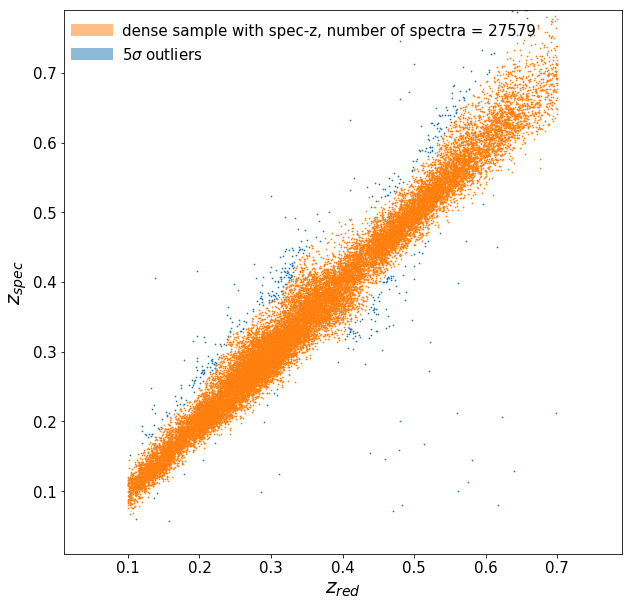

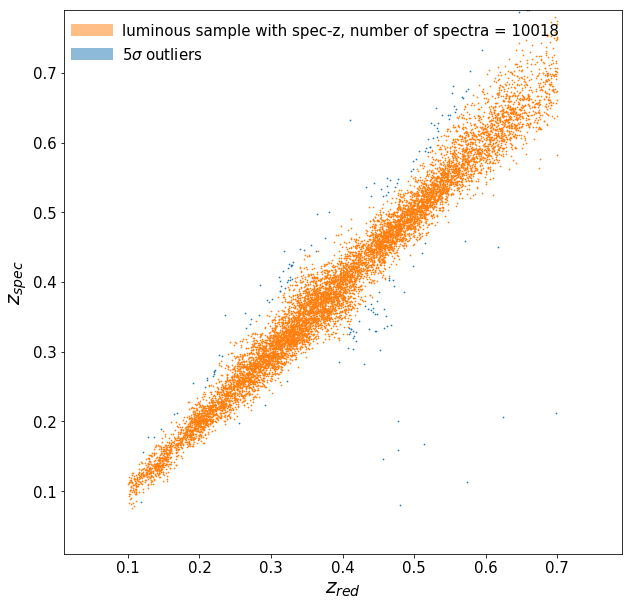

In [109]:
red_scatter_dense()
red_scatter_lum()

In [167]:
def outlier_dense():
    
    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    #out_mask =  np.abs(z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])>0.08
    #mask_lum = z_dense[mask_one][arg_one][out_mask]
    zp_all = z_dense[mask_one][arg_one]
    zs_all = z_specall[mask_two][arg_two]
    
    plt.figure(figsize=(8,5))

    bins = np.linspace(0.1,0.7,12)
    rate = []
    err = []
    for k in range(len(bins)-1):
        
        zp = zp_all[(zp_all>bins[k])&(zp_all<bins[k+1])] 
        zs = zs_all[(zp_all>bins[k])&(zp_all<bins[k+1])]
        ez = (zp - zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp) > outlier_limit
        rate.append(len(mask[mask==True])*1./len(mask))  
        err.append(len(mask[mask==True])*.5/len(mask))
    #print "mean sigma rate" , np.median(np.array(rate))

    #plt.errorbar(0.5*(bins[1:]+bins[:-1]) , np.array(rate), err, lw = 2, fmt='-o' , capsize=3)
    #plt.plot(0.5*(bins[1:]+bins[:-1]) , np.array(rate), lw = 2, label = "luminous sample")    

    rate = []
    err = []
    for k in range(len(bins)-1):
        
        zp = zp_all[(zp_all>bins[k])&(zp_all<bins[k+1])] 
        zs = zs_all[(zp_all>bins[k])&(zp_all<bins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./len(mask))  
        err.append(len(mask[mask==True])*.5/len(mask))
    print "mean sigma rate" , np.median(np.array(rate))
    plt.plot(0.5*(bins[1:]+bins[:-1]) , np.array(rate), lw = 2, label = "dense sample")    


    #######################################################################################################3
    mask_one = np.where((np.in1d(ID_lum , ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    out_mask =  np.abs(z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])>0.08
    mask_lum = z_lum[mask_one][arg_one][out_mask]
    zp_all = z_lum[mask_one][arg_one]
    zs_all = z_spec[mask_two][arg_two]
    
    bins = np.linspace(0.1,0.7,12)
    rate = []
    err = []
   
    for k in range(len(bins)-1):
        
        zp = zp_all[(zp_all>bins[k])&(zp_all<bins[k+1])] 
        zs = zs_all[(zp_all>bins[k])&(zp_all<bins[k+1])]
        ez = (zp - zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp) > outlier_limit
        rate.append(len(mask[mask==True])*1./len(mask))  
        err.append(len(mask[mask==True])*.5/len(mask))

    rate = []
    err = []
    for k in range(len(bins)-1):
        
        zp = zp_all[(zp_all>bins[k])&(zp_all<bins[k+1])] 
        zs = zs_all[(zp_all>bins[k])&(zp_all<bins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./len(mask))  
        err.append(len(mask[mask==True])*.5/len(mask))
        
    print "mean sigma rate" , np.median(np.array(rate))
    #plt.errorbar(0.5*(bins[1:]+bins[:-1]) , np.array(rate), err, lw = 2, fmt='-o' , capsize=3)    
    plt.plot(0.5*(bins[1:]+bins[:-1]) , np.array(rate), lw = 2, label = "luminous sample")    
    plt.legend(fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks([0.00, 0.02,0.04,0.06,0.08], fontsize = 15)
    plt.xlabel("photometric redshift" , fontsize = 15)
    plt.ylabel(r"$5\sigma \; \mathrm{Outlier \; Rate}$", fontsize = 15)
    #plt.text( 0.2, 0.01, "Dense sample", fontsize = 20)

     
    return None

mean sigma rate 0.012965964343598054
mean sigma rate 0.014261744966442953


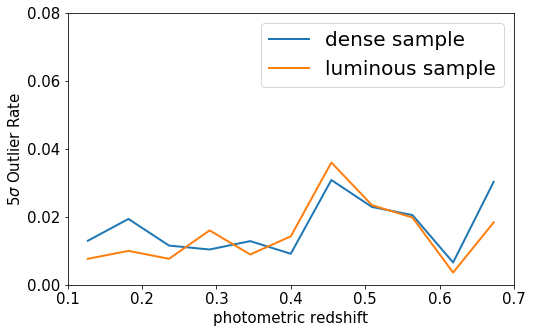

In [168]:
outlier_dense()

In [27]:
def outlier_clump(zmin, zmax):
    
    mask_one = np.where((np.in1d(ID_dense , ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    out_mask =  np.abs(z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])>0.08
    mask_lum = z_dense[mask_one][arg_one][out_mask]
    zp_all = z_dense[mask_one][arg_one]
    
    ras_all = RA_spec[mask_two][arg_two]
    des_all = DEC_spec[mask_two][arg_two]
    zs_all = z_spec[mask_two][arg_two]
    

    zp = zp_all[(zp_all>zmin)&(zp_all<zmax)]
    zs = zs_all[(zp_all>zmin)&(zp_all<zmax)]
    
    ras = ras_all[(zp_all>zmin)&(zp_all<zmax)]
    decs = des_all[(zp_all>zmin)&(zp_all<zmax)]
    
    ez = (zp - zs)
    x75, x25 = np.percentile(ez,[84,16.])
    sz = (x75 - x25)/2
    out_limit = 5.*sz 
    core_limit = 0.02*sz
    out_mask = np.abs(zs-zp) > out_limit
    core_mask = np.abs(zs-zp) < core_limit
    
    out_ra=ras[out_mask]
    out_dec=decs[out_mask]
    core_ra=ras[core_mask]
    core_dec=decs[core_mask]
    
    print "out_ra" , out_ra
    print "out_dec", out_dec
    
    print "core_ra" , core_ra
    print "core_dec", core_dec
    
    plt.figure(figsize=(6,6))
    plt.scatter(out_ra, out_dec , label = "outlier")
    plt.scatter(core_ra, core_dec , label = "good")

    plt.legend()
     
    return None


In [23]:
def outlier_clump(zmin, zmax):
    
    mask_one = np.where((np.in1d(ID_dense , ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    out_mask =  np.abs(z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])>0.08
    mask_lum = z_dense[mask_one][arg_one][out_mask]
    zp_all = z_dense[mask_one][arg_one]
    
    ras_all = RA_spec[mask_two][arg_two]
    des_all = DEC_spec[mask_two][arg_two]
    zs_all = z_spec[mask_two][arg_two]
    cs_all = colors_spec[mask_two][arg_two]
    mi_all = mi_spec[mask_two][arg_two]
    zp = zp_all[(zp_all>zmin)&(zp_all<zmax)]
    zs = zs_all[(zp_all>zmin)&(zp_all<zmax)]
    cs = cs_all[(zp_all>zmin)&(zp_all<zmax)]
    mis = mi_all[(zp_all>zmin)&(zp_all<zmax)]

    
    ras = ras_all[(zp_all>zmin)&(zp_all<zmax)]
    decs = des_all[(zp_all>zmin)&(zp_all<zmax)]
    
    ez = (zp - zs)/(1+zs)
    x75, x25 = np.percentile(ez,[84,16.])
    sz = (x75 - x25)/2
    sz = median_absolute_deviation(ez)
    out_limit = 5.*sz 
    core_limit = 2.*sz
    out_mask = np.abs(zs-zp)/(1.+zs) > out_limit
    core_mask = np.abs(zs-zp)/(1.+zs) < core_limit
    
    out_ra=ras[out_mask]
    out_dec=decs[out_mask]
    core_ra=ras[core_mask]
    core_dec=decs[core_mask]
    
    #print core_ra
    #print core_dec
    #print out_ra
    #print out_dec
    
    out_cs = cs[out_mask]
    out_mis = mis[out_mask]
    core_cs = cs[core_mask]
    core_mis = mis[core_mask]
    
    
    plt.figure(figsize=(6,6))
    plt.scatter(core_mis, core_cs[:,0], label = "0.01-sigma precise")

    plt.scatter(out_mis, out_cs[:,0] , label = "5-sigma outlier")
    plt.xlabel("mi", fontsize = 20)
    plt.ylabel("u-g", fontsize = 20)
    plt.legend()
    plt.ylim([0,3.5])
     
    return None

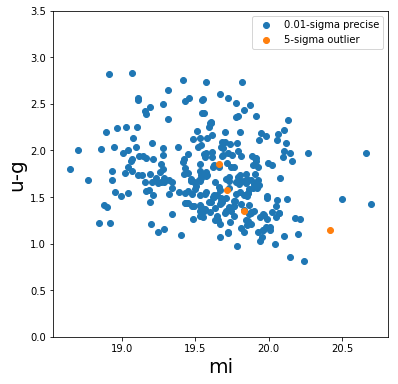

In [24]:
outlier_clump(0.54,0.55)

In [28]:
def quantile(x, q, weights=None):
    """
    Compute sample quantiles with support for weighted samples.
    Note
    ----
    When ``weights`` is ``None``, this method simply calls numpy's percentile
    function with the values of ``q`` multiplied by 100.
    Parameters
    ----------
    x : array_like[nsamples,]
       The samples.
    q : array_like[nquantiles,]
       The list of quantiles to compute. These should all be in the range
       ``[0, 1]``.
    weights : Optional[array_like[nsamples,]]
        An optional weight corresponding to each sample. These
    Returns
    -------
    quantiles : array_like[nquantiles,]
        The sample quantiles computed at ``q``.
    Raises
    ------
    ValueError
        For invalid quantiles; ``q`` not in ``[0, 1]`` or dimension mismatch
        between ``x`` and ``weights``.
    """
    x = np.atleast_1d(x)
    q = np.atleast_1d(q)

    if np.any(q < 0.0) or np.any(q > 1.0):
        raise ValueError("Quantiles must be between 0 and 1")

    if weights is None:
        return np.percentile(x, list(100.0 * q))
    else:
        weights = np.atleast_1d(weights)
        if len(x) != len(weights):
            raise ValueError("Dimension mismatch: len(weights) != len(x)")
        idx = np.argsort(x)
        sw = weights[idx]
        cdf = np.cumsum(sw)[:-1]
        cdf /= cdf[-1]
        cdf = np.append(0, cdf)
        return np.interp(q, cdf, x[idx]).tolist()
    

In [126]:
def red_bias_scatter_dense():
    nbins = 12
    bins = np.linspace(0.11 , 0.69 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    
    mask_one = np.where((np.in1d(ID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    y3 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    running_bias_std = [median_absolute_deviation(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))

    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y3, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std ,lw = 4, label = "SMAD")
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", label = "Bias2")
    
    print "mean bias" , np.median(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(np.abs(bin_std))
    plt.plot(np.linspace(0.05,0.8,200) , 1.4826*np.mean(np.abs(bin_std))*np.linspace(0.05,0.8,200)/np.linspace(0.05,0.8,200), "r--")

    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{red}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.009,0.029])
    plt.text( 0.1, 0.025, "Dense sample", fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    return None



def red_bias_scatter_lum():
    
    nbins = 10
    bins = np.linspace(0.11, 0.69 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    y3 = (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_mad3 = [median_absolute_deviation(y3[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    

    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y3, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))
    plt.figure(figsize = (10,10))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std ,lw = 4, label = "SMAD")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", label = "Bias")
    
    print "mean bias" , np.median(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(np.abs(bin_std))
    plt.plot(np.linspace(0.05,0.8,200) , 1.4826*np.mean(np.abs(bin_std))*np.linspace(0.05,0.8,200)/np.linspace(0.05,0.8,200), "r--")

    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{red}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.009,0.029])
    plt.text( 0.1, 0.025, "Luminous sample", fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    return None

mean bias 0.0011306628313172418
mean scatter 0.015197177840086036
mean bias 0.0009926760126489076
mean scatter 0.014670454773222102


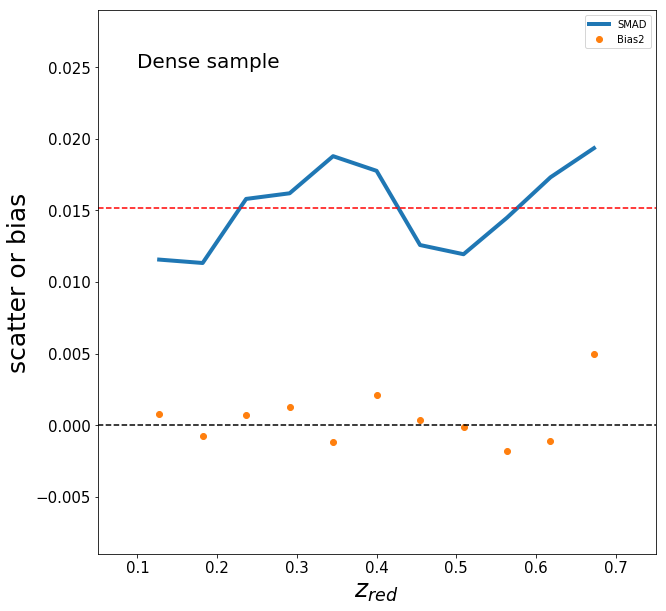

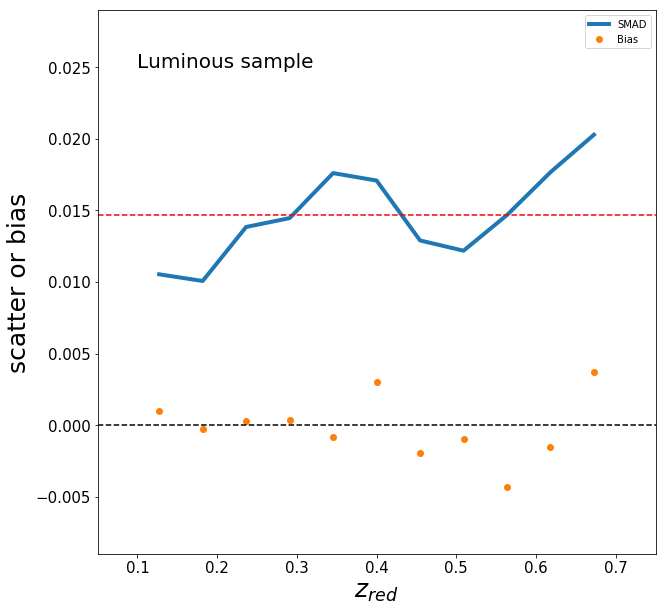

In [127]:
red_bias_scatter_dense()
red_bias_scatter_lum()

In [128]:
import corner
from matplotlib import lines as mlines
levels = [0.68,0.95,0.99]


def red_mag_dense():
    
    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    plt.figure(figsize=(10,10))
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="dense sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="dense sample")
    
    corner.hist2d(z_dense[mask_one][arg_one] , mi_specall[mask_two][arg_two], color='#FF7F0E', plot_datapoints=False,
                 bins=100, levels=levels, fill_contours=True, smooth=1.0)
    
    corner.hist2d(z_dense , mi_dense, color='#1F77B4', plot_datapoints=False,
                 bins=100, levels=levels, fill_contours=True, smooth=1.0)
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])

    plt.xlim((0.05,0.75))
    plt.ylim(16,22)

    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$i-band \; magnitude$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

def red_mag_lum():
    
    mask_one = np.where((np.in1d(ID_lum , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    plt.figure(figsize=(10,10))
    
    
    
    
    
    corner.hist2d(z_lum[mask_one][arg_one] , mi_specall[mask_two][arg_two], color='#FF7F0E', plot_datapoints=False,
                 bins=50, levels=levels, fill_contours=True, smooth=1.0, label = "luminous sample with spec-z")
    corner.hist2d(z_lum , mi_lum, color='#1F77B4',plot_datapoints=False,
                 bins=50, levels=levels, fill_contours=True, smooth=1.0, label = "luminous sample")
    thick_line1 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="luminous sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="luminous sample")
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    plt.xlim((0.05,0.75))
    plt.ylim(16,22)
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$i-band \; magnitude$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

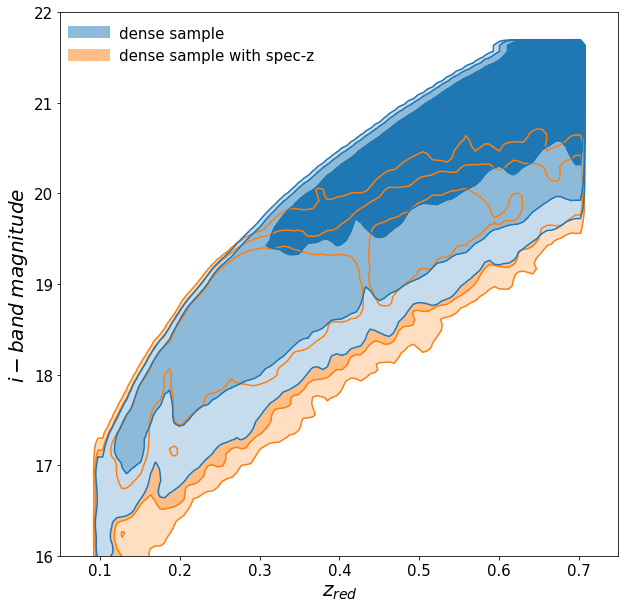

In [129]:
red_mag_dense()

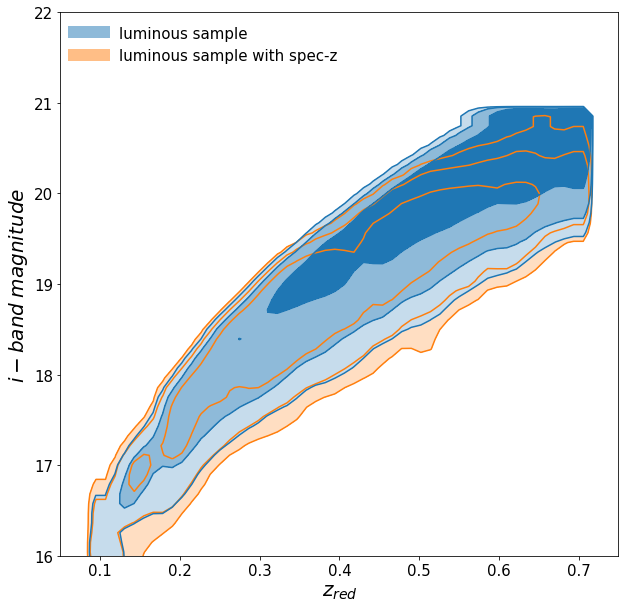

In [130]:
red_mag_lum()

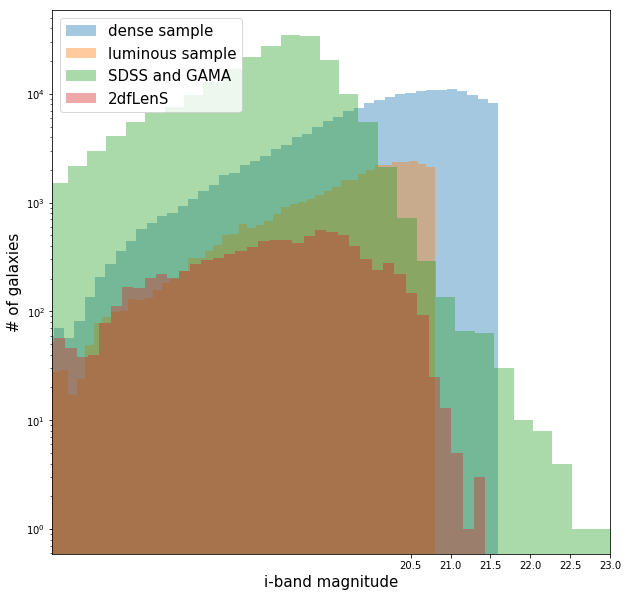

In [116]:
plt.figure(figsize = (10,10))
sns.distplot(mi_dense , kde =False , label="dense sample")
sns.distplot(mi_lum , kde = False , label = "luminous sample")
sns.distplot(mi_spec , kde = False , label = "SDSS and GAMA")
sns.distplot(mi_2df , kde = False , label = "2dfLenS")
plt.xticks([20.5,21,21.5,22,22.5,23])
plt.xlim([16,23])
plt.legend(loc='best' , fontsize = 15)
plt.xlabel("i-band magnitude" , fontsize = 15)
plt.ylabel("# of galaxies" , fontsize = 15)
plt.yscale("log")

In [141]:
def mi_bias_scatter_dense_2df():
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.0),nbins)
    delta = bins[1]-bins[0]
    
    scatter
    
    mask_one = np.where((np.in1d(ID_dense, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))
    #lt.plot(bins , running_sigma682 , lw= 4, label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    #plt.errorbar(bins , running_bias , yerr = running_bias_std, color = "blue" , label = r"$\mathrm{bias} \; \delta z$")
    #lt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    #plt.title(r"$L/L_{\star}>1$" , fontsize = 25)
    plt.legend(loc = 'best' , fontsize = 10)
    #lt.xlim([0.05,0.75])
    plt.ylim([-0.1,0.04])

    #lt.text( 0.2, 0.02, "$L/L_{\star}>0.5$", fontsize = 30)

    
    return None



def mi_bias_scatter_lum_2df():
    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(20.),nbins)
    print bins
    delta = bins[1]-bins[0]
    
   
    
    mask_one = np.where((np.in1d(ID_lum, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    
    y2 = (z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))
    #lt.plot(bins , running_sigma682 , lw= 4, label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    #plt.errorbar(bins , running_bias , yerr = running_bias_std, color = "blue" , label = r"$\mathrm{bias} \; \delta z$")
    #lt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    #plt.title(r"$L/L_{\star}>1$" , fontsize = 25)
    plt.legend(loc = 'best' , fontsize = 10)
    #lt.xlim([0.05,0.75])
    plt.ylim([-0.1,0.04])

    #lt.text( 0.2, 0.02, "$L/L_{\star}>0.5$", fontsize = 30)

    
    return None


[17.5        17.76158008 18.02707012 18.29652855 18.57001469 18.84758875
 19.12931183 19.41524594 19.70545404 20.        ]


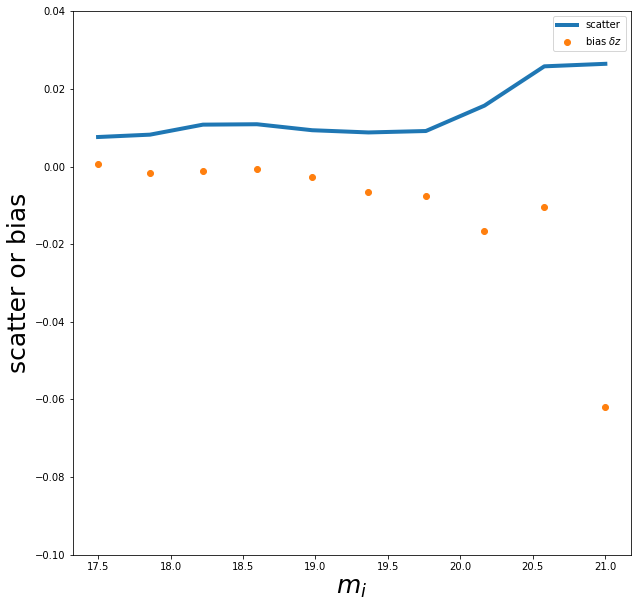

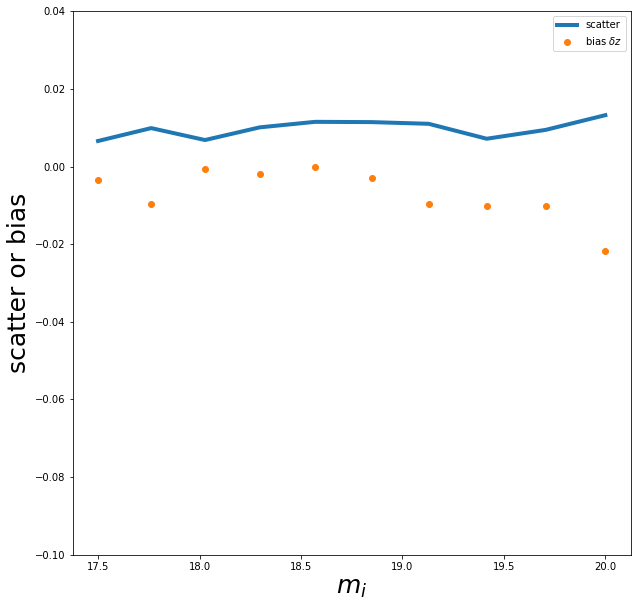

In [142]:
mi_bias_scatter_dense_2df()
mi_bias_scatter_lum_2df()

In [169]:
def mi_bias_scatter_dense_spec():
    plt.figure(figsize = (10,10))

    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = mi_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    plt.figure(figsize = (10,10))
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(16,21.5,10))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std ,lw = 4, label = "SMAD")
    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(16,21.5,10))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", label = "Bias")
  
    """
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_dense, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    y2 = (z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)

    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    """
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.045])
    
    return None



def mi_bias_scatter_lum_spec():
    
    plt.figure(figsize = (10,10))

    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_lum, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    y2 = (z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = mi_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    plt.figure(figsize = (10,10))
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(16,20.8,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std ,lw = 4, label = "SMAD")
    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(16,20.8,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", label = "Bias")
    
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    #plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    #plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    """
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_lum, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    y2 = (z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    """
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.02,0.035])

    return None


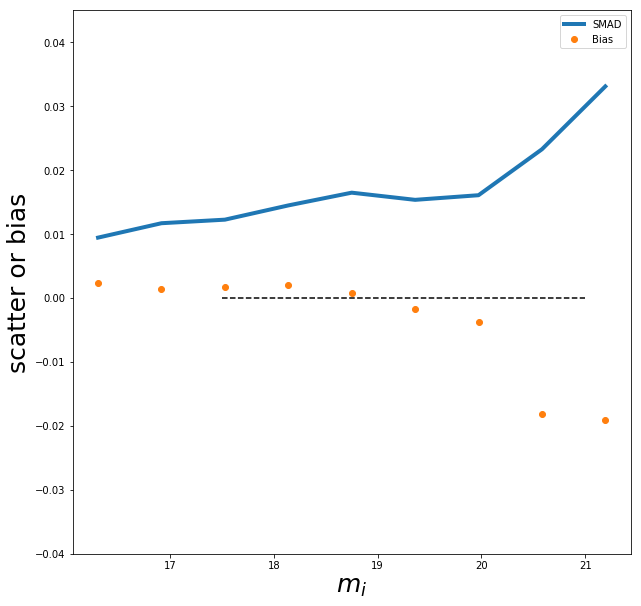

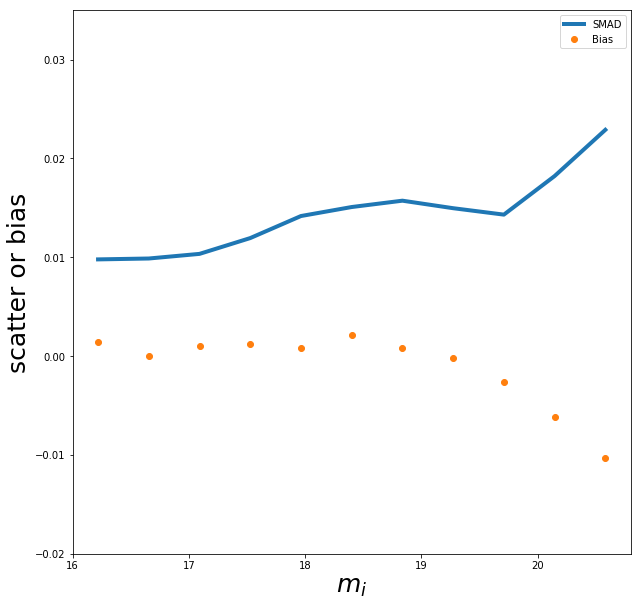

In [170]:
mi_bias_scatter_dense_spec()
mi_bias_scatter_lum_spec()

In [171]:
def z_bias_scatter_dense_spec():
    plt.figure(figsize = (10,10))

    
    nbins = 15
    bins = np.linspace(0.11,0.7,nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_dense, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    print arg_two.shape , "specx dense lrg"

    y2 = (z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    #plt.plot(bins , -1.*running_mad2 ,lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    nbins = 15
    bins = np.linspace(0.11,0.7,nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_dense, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    print arg_two.shape , "2df x dense lrg"

    y2 = (z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)

    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$z$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.025])
    
    return None



def z_bias_scatter_lum_spec():
    
    plt.figure(figsize = (10,10))

    
    nbins = 15
    bins = np.linspace(0.15,0.7,nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_lum, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    print arg_two.shape , "specxlrg"

    y2 = (z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    nbins = 15
    bins = np.linspace(0.15,0.7,nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_lum, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    print arg_two.shape , "2dfxlrg"
    y2 = (z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$z$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.025])

    return None


(25829,) specx dense lrg
(1750,) 2df x dense lrg
(9242,) specxlrg
(776,) 2dfxlrg


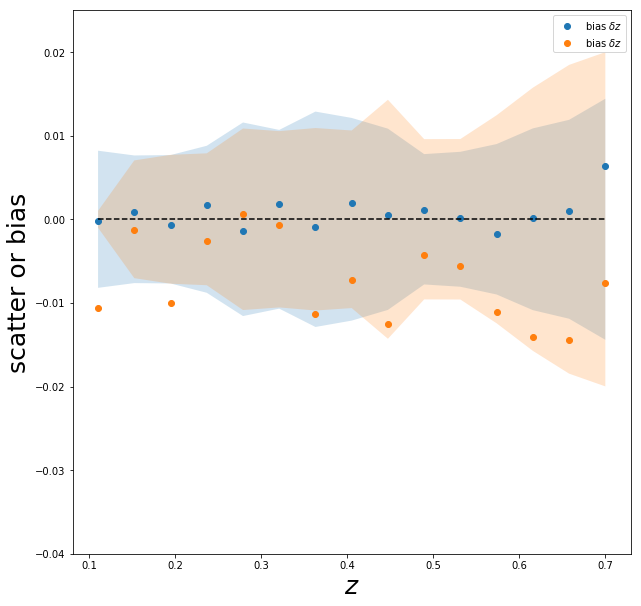

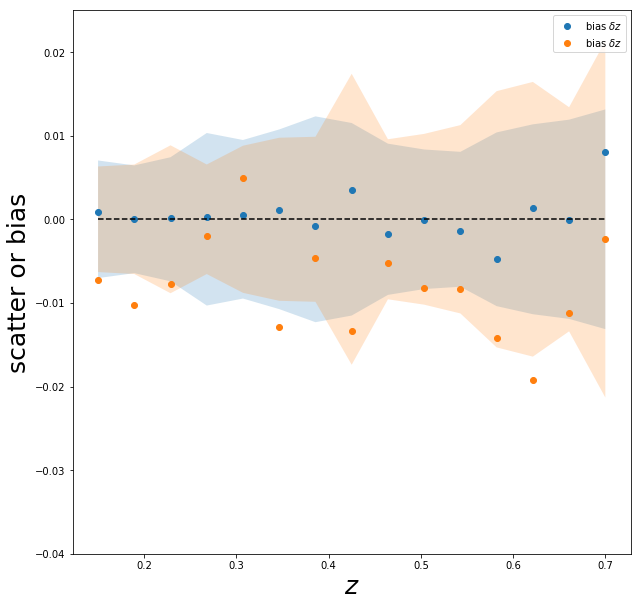

In [120]:
z_bias_scatter_dense_spec()
z_bias_scatter_lum_spec()

In [40]:
mask_one = np.where((np.in1d(ID_kids , ID_2df)==True))[0]
mask_two = np.where((np.in1d(ID_2df  , ID_kids[mask_one])==True))[0]
    
arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_2df[mask_two])

In [41]:
colors_2df = colors[mask_one][arg_one]
mi_2df = mi[mask_one][arg_one]
z_2df_sort = z_2df[mask_two][arg_two]

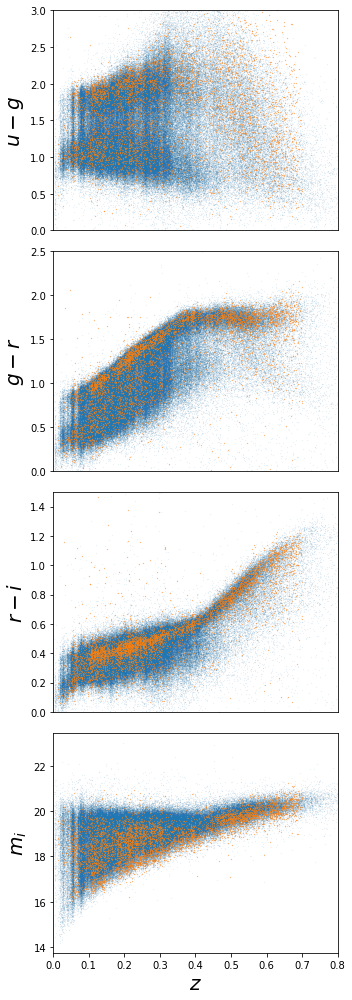

In [175]:
fig , ax = plt.subplots(nrows=4,ncols=1 , figsize=(5,14))


ax[0].scatter(z_spec , color_spec[:,0] , s = 0.001 )
ax[1].scatter(z_spec , color_spec[:,1] , s = 0.001)
ax[2].scatter(z_spec , color_spec[:,2] , s = 0.001)
ax[3].scatter(z_spec, mi_spec, s= 0.001)

ax[0].scatter(z_2df_sort , colors_2df[:,0] , s = 0.05 )
ax[1].scatter(z_2df_sort , colors_2df[:,1] , s = 0.05)
ax[2].scatter(z_2df_sort , colors_2df[:,2] , s = 0.05)
ax[3].scatter(z_2df_sort, mi_2df, s= 0.05)


ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xticks([])

ax[3].set_xlim(0,0.8)


ax[3].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)
ax[3].set_ylabel(r"$m_i$" , fontsize = 20)

plt.tight_layout()

In [194]:
colors_2df[:,0].shape

(5571,)

In [53]:
mask_one = np.where((np.in1d(ID_kids , ID_dense)==True))[0]
mask_two = np.where((np.in1d(ID_dense  , ID_kids[mask_one])==True))[0]
    
arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_dense[mask_two])
colors_dense = colors[mask_one][arg_one]
mi_dense = mi[mask_one][arg_one]
z_dense_sort = z_dense[mask_two][arg_two]

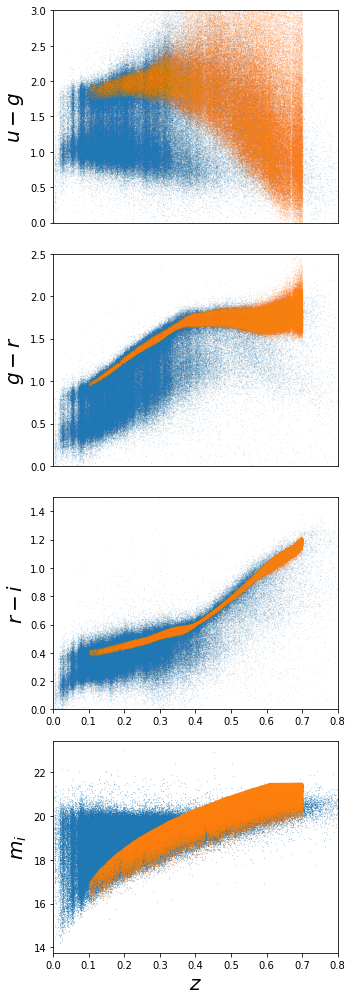

In [55]:
fig , ax = plt.subplots(nrows=4,ncols=1 , figsize=(5,14))


ax[0].scatter(z_spec , color_spec[:,0] , s = 0.001 )
ax[1].scatter(z_spec , color_spec[:,1] , s = 0.001)
ax[2].scatter(z_spec , color_spec[:,2] , s = 0.001)
ax[3].scatter(z_spec , mi_spec , s = 0.01)


ax[0].scatter(z_dense_sort , colors_dense[:,0] , s = 0.001 )
ax[1].scatter(z_dense_sort , colors_dense[:,1] , s = 0.001)
ax[2].scatter(z_dense_sort , colors_dense[:,2] , s = 0.001)
ax[3].scatter(z_dense_sort, mi_dense, s= 0.01)

ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)

ax[3].set_xlim(0,0.8)


ax[3].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)
ax[3].set_ylabel(r"$m_i$" , fontsize = 20)

plt.tight_layout()

In [31]:
mask_one = np.where((np.in1d(ID_kids , ID_lum)==True))[0]
mask_two = np.where((np.in1d(ID_lum  , ID_kids[mask_one])==True))[0]


arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_lum[mask_two])

In [166]:
colors_lum = colors[mask_one][arg_one]
z_lum_sort = z_lum[mask_two][arg_two]
mi_lum = mi[mask_one][arg_one]

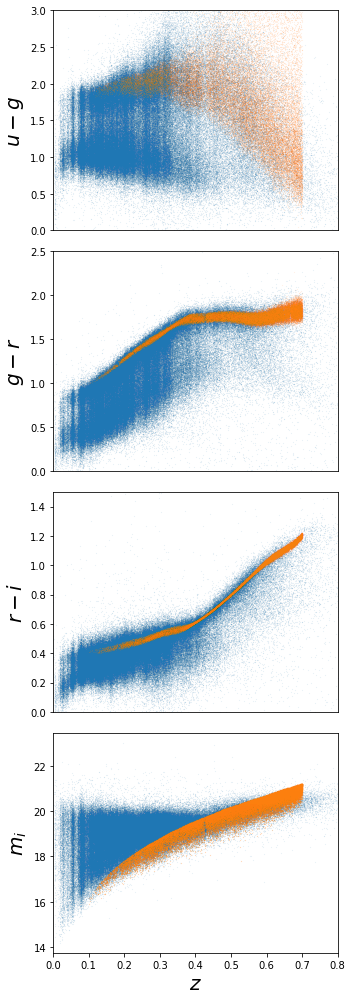

In [168]:
fig , ax = plt.subplots(nrows=4,ncols=1 , figsize=(5,14))


ax[0].scatter(z_spec , color_spec[:,0] , s = 0.001 )
ax[1].scatter(z_spec , color_spec[:,1] , s = 0.001)
ax[2].scatter(z_spec , color_spec[:,2] , s = 0.001)
ax[3].scatter(z_spec, mi_spec, s= .001)

ax[0].scatter(z_lum_sort , colors_lum[:,0] , s = 0.001 )
ax[1].scatter(z_lum_sort , colors_lum[:,1] , s = 0.001)
ax[2].scatter(z_lum_sort , colors_lum[:,2] , s = 0.001)
ax[3].scatter(z_lum_sort, mi_lum, s = 0.01)

ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xticks([])

ax[3].set_xlim(0,0.8)

ax[3].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)
ax[3].set_ylabel(r"$m_i$" , fontsize = 20)

plt.tight_layout()

In [56]:
def red_bias_scatter_dense():
    plt.figure(figsize = (10,10))
    nbins = 10
    bins = np.linspace(0.11 , 0.7 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    ID_dense_copy = ID_dense[mask_one][arg_one]
    z_spec_matched_to_dense = z_specall[mask_two][arg_two]
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.plot(bins , running_mad2 , lw = 4, color = '#FF7F0E', label = "mad redMaGiC")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = '#FF7F0E', label = "bias redMaGiC")
    
    
    mask_one = np.where((np.in1d(ID_kids, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    y2 = (z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_ann[mask_one][arg_one])
    z2 = z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, color = '#1F77B4', label = "mad ANNz2")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = '#1F77B4', label = "bias ANNz2")
    
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.05,0.05])
    plt.text( 0.2, 0.03, "$L/L_{\star}>0.5$", fontsize = 30)

    
    return None

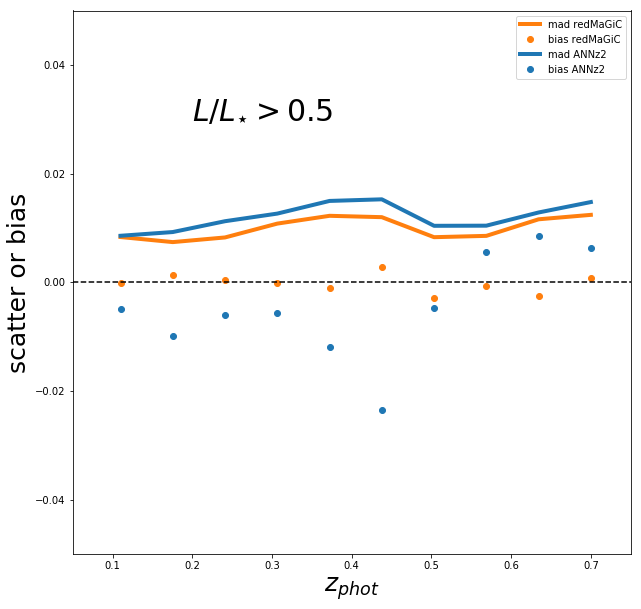

In [57]:
red_bias_scatter_dense()

In [48]:
def red_bias_scatter_dense():
    plt.figure(figsize = (10,10))
    nbins = 8
    bins = np.linspace(0.13 , 0.67 , nbins)
    delta = bins[1]-bins[0]
    
    
    mask_one = np.where((np.in1d(ID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    ID_dense_copy = ID_dense[mask_one][arg_one]
    z_spec_matched_to_dense = z_specall[mask_two][arg_two]
    

    obins = np.linspace(0.1,0.7, nbins+10)
    rate = []
    err = []
    zs_all = z_specall[mask_two][arg_two]
    zp_all = z_dense[mask_one][arg_one]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True]))  
        err.append(len(mask[mask==True])*.5/len(mask))
    print "mean 5- sigma rate" , np.sum(np.array(rate))*100./len(zs_all)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  np.abs(z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0/out_mask.shape[0]
    
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = '#FF7F0E', label = "SMAD redMaGiC")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = '#FF7F0E', label = "Bias redMaGiC")
    #######################################################################################################
    
    nbins = 8
    bins = np.linspace(0.13 , 0.67 , nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(bright_z_ID, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    y2 = (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])
    z2 = bright_z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = bright_z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    obins = np.linspace(0.1,0.7, nbins+10)
    rate = []
    err = []
    zs_all = bright_z_ann[mask_one][arg_one]
    zp_all = z_spec_matched_to_dense[mask_two][arg_two]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True]))  
        err.append(len(mask[mask==True])*.5/len(mask))
    print "mean 5- sigma rate" , np.sum(np.array(rate))*100./len(zs_all)
    
    
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  np.abs(bright_z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0/out_mask.shape[0]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = "g", label = "SMAD bright ANNz2")
    plt.plot(bins , running_bias2 , lw = 0, color = "g", marker = "o", label = "Bias bright ANNz2")
    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    y2 = (z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_ann[mask_one][arg_one])
    z2 = z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    obins = np.linspace(0.1,0.7, nbins+10)
    rate = []
    err = []
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    zp_all = z_ann[mask_one][arg_one]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True]))  
        err.append(len(mask[mask==True])*.5/len(mask))
    print "mean 5- sigma rate" , np.sum(np.array(rate))*100./len(zs_all)
    
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  np.abs(z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0/out_mask.shape[0]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = '#1F77B4', label = "SMAD fiducial ANNz2")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = '#1F77B4', label = "Bias fiducial ANNz2")
    
    nbins = 8
    bins = np.linspace(0.13 , 0.67 , nbins)
    delta = bins[1]-bins[0]
    
    y2 = (z_bpz[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])
    z2 = z_bpz[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = z_bpz[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    
    obins = np.linspace(0.1,0.7, nbins+10)
    rate = []
    err = []
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    zp_all = z_bpz[mask_one][arg_one]
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        x75, x25 = np.percentile(ez,[84,16.])
        sz = (x75 - x25)/2
        outlier_limit = 5.*sz
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True]))  
        err.append(len(mask[mask==True])*.5/len(mask))
    print "mean 5- sigma rate" , np.sum(np.array(rate))*100./len(zs_all)
    
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  np.abs(z_bpz[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0/out_mask.shape[0]
    
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = 'red', label = "SMAD BPZ")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = 'red', label = "Bias BPZ")
    
    
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.06,0.06])
    plt.text( 0.1, 0.045, "Dense sample", fontsize = 20)

    
    return None

mean 5- sigma rate 0.31459048996564815
mean bias 0.00042446832395454104
mean scatter 0.014730838156638741
5sigma outlier fraction 0.00325438437895
mean 5- sigma rate 0.24741539277193603
mean bias 0.0019049644699913187
mean scatter 0.013317413426840116
5sigma outlier fraction 0.00207652204648
mean 5- sigma rate 0.18441511480744893
mean bias 0.005206242205043992
mean scatter 0.017513168980028703
5sigma outlier fraction 0.00596637136142
mean 5- sigma rate 0.18803109745073224
mean bias 0.017069995403289795
mean scatter 0.018916585007176183
5sigma outlier fraction 0.00611101066715


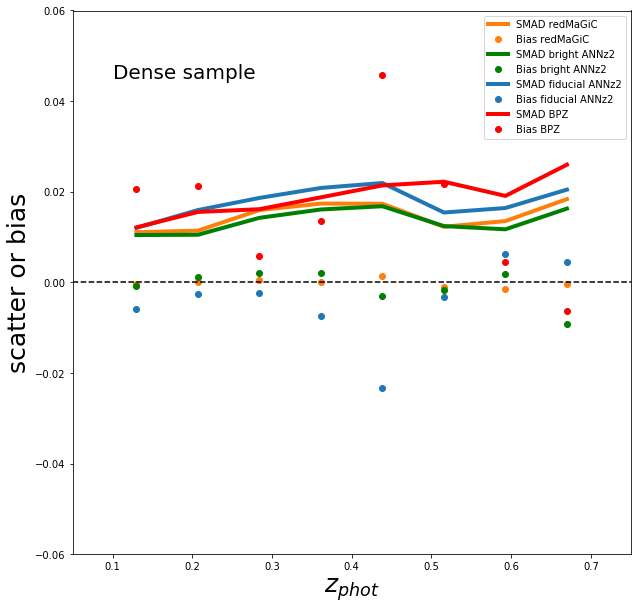

In [49]:
red_bias_scatter_dense()

In [172]:
def outlier_dense():
    
    plt.figure(figsize = (10,10))
    nbins = 21

    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_dense_copy = ID_dense[mask_one][arg_one]
    z_spec_matched_to_dense = z_specall[mask_two][arg_two]
    
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_specall[mask_two][arg_two]
    zp_all = z_dense[mask_one][arg_one]
    out = []
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit redmagic" , outlier_limit
        out.append(outlier_limit)
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    print "redmagic outlier" , np.array(out) , np.median(np.array(out)) 
    
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2 , label = "redMaGiC")


    #######################################################################################################

    mask_one = np.where((np.in1d(bright_z_ID, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zp_all = bright_z_ann[mask_one][arg_one]
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit bright annz",  outlier_limit        
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2, label = "bright ANNz2")

    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    zp_all = z_ann[mask_one][arg_one]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit annz",  outlier_limit

        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2, label = "fiducial ANNz2")




    
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    zp_all = z_bpz[mask_one][arg_one]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit bpz",  outlier_limit
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1.0/(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    print "mean 5- sigma rate" , np.sum(np.array(rate))*100./len(zs_all)
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2 ,label = "BPZ")

    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("5-sigma outlier rate" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([0,0.06])
    #plt.text( 0.1, 0.045, "Dense sample", fontsize = 20)

    
    return None

outlier limit redmagic 0.0373545914768082
outlier limit redmagic 0.03940925242038231
outlier limit redmagic 0.03786470393209773
outlier limit redmagic 0.04058303866192433
outlier limit redmagic 0.05629805742263175
outlier limit redmagic 0.05620533762659201
outlier limit redmagic 0.0530563435636502
outlier limit redmagic 0.056185785619512194
outlier limit redmagic 0.06773753388067771
outlier limit redmagic 0.061040771004644084
outlier limit redmagic 0.058374588100601095
outlier limit redmagic 0.04482409044578206
outlier limit redmagic 0.03809678361816261
outlier limit redmagic 0.04141610575199128
outlier limit redmagic 0.04174714210946729
outlier limit redmagic 0.04865364627086769
outlier limit redmagic 0.056756930189841306
outlier limit redmagic 0.06040881588320403
outlier limit redmagic 0.058008757669707436
outlier limit redmagic 0.07553624165379823
redmagic outlier [0.03735459 0.03940925 0.0378647  0.04058304 0.05629806 0.05620534
 0.05305634 0.05618579 0.06773753 0.06104077 0.058374

/software/local/lib64/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/software/local/lib64/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


outlier limit bright annz nan
outlier limit bright annz nan
outlier limit annz 0.040532889169249485
outlier limit annz 0.05294585706634669
outlier limit annz 0.058385313001984865
outlier limit annz 0.050167925352591194
outlier limit annz 0.06584302345033682
outlier limit annz 0.06297267427557413
outlier limit annz 0.06060809977225624
outlier limit annz 0.0705792370782078
outlier limit annz 0.06968070434914184
outlier limit annz 0.07382276225108722
outlier limit annz 0.06994533502358719
outlier limit annz 0.05627144547453159
outlier limit annz 0.049742698844492506
outlier limit annz 0.05187095208539296
outlier limit annz 0.049675510852581956
outlier limit annz 0.05673974905296787
outlier limit annz 0.06234618293778306
outlier limit annz 0.0643400712799709
outlier limit annz 0.07546064320607879
outlier limit annz 0.0852881759588047
outlier limit bpz 0.04602260344495581
outlier limit bpz 0.046373433948901054
outlier limit bpz 0.055294558126907194
outlier limit bpz 0.04411336617304708
outl

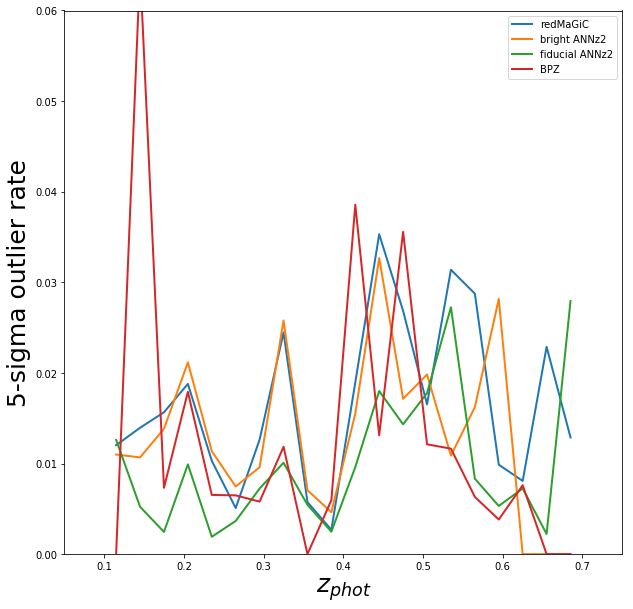

In [173]:
outlier_dense()

In [174]:
def badfraction_dense():
    
   
    nbins = 14

    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_dense_copy = ID_dense[mask_one][arg_one]
    z_spec_matched_to_dense = z_specall[mask_two][arg_two]
    
    
    obins = np.linspace(0.1,0.7, nbins)
    
    zs_all = z_specall[mask_two][arg_two]
    zp_all = z_dense[mask_one][arg_one]
    
    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.0546210645915812 #Thus roughly corresponds to 5sigma 
    print "bad fraction redmagic" , len(mask[mask==True])*1.0/len(mask)

    #######################################################################################################

    mask_one = np.where((np.in1d(bright_z_ID, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zp_all = bright_z_ann[mask_one][arg_one]
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    
    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.0546210645915812
    print "bad fraction bright annz" , len(mask[mask==True])*1.0/len(mask)

    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    zp_all = z_ann[mask_one][arg_one]

    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.0546210645915812
    print "bad fraction fiducial annz" , len(mask[mask==True])*1.0/len(mask)

    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_dense[mask_two][arg_two]
    zp_all = z_bpz[mask_one][arg_one]
    
    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.0546210645915812
    print "bad fraction bpz" , len(mask[mask==True])*1.0/len(mask)
    
    
    return None

In [175]:
badfraction_dense()

bad fraction redmagic 0.0127208480565
bad fraction bright annz 0.00926173301273
bad fraction fiducial annz 0.0149153803236
bad fraction bpz 0.0415845266877


In [176]:
def outlier_lum():
    
    plt.figure(figsize = (10,10))
    nbins = 21

    mask_one = np.where((np.in1d(ID_lum , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_lum_copy = ID_lum[mask_one][arg_one]
    z_spec_matched_to_lum = z_specall[mask_two][arg_two]
    
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_specall[mask_two][arg_two]
    zp_all = z_lum[mask_one][arg_one]
    out = []
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit redmagic" , outlier_limit
        out.append(outlier_limit)
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    print "redmagic outlier" , np.array(out) , np.median(np.array(out)) 
    
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2 , label = "redMaGiC")


    #######################################################################################################

    mask_one = np.where((np.in1d(bright_z_ID, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zp_all = bright_z_ann[mask_one][arg_one]
    zs_all = z_spec_matched_to_lum[mask_two][arg_two]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit bright annz",  outlier_limit        
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2, label = "bright ANNz2")

    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_lum[mask_two][arg_two]
    zp_all = z_ann[mask_one][arg_one]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit annz",  outlier_limit

        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1./(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2, label = "fiducial ANNz2")




    
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_lum[mask_two][arg_two]
    zp_all = z_bpz[mask_one][arg_one]
    
    for k in range(len(obins)-1):
        
        zp = zp_all[(zp_all>obins[k])&(zp_all<obins[k+1])] 
        zs = zs_all[(zp_all>obins[k])&(zp_all<obins[k+1])]
        ez = (zp - zs)/(1+zs)
        #x75, x25 = np.percentile(ez,[84,16.])
        #sz = (x75 - x25)/2
        sz = median_absolute_deviation(ez)
        outlier_limit = 5.*sz
        print "outlier limit bpz",  outlier_limit
        mask = np.abs(zs-zp)/(1+zs) > outlier_limit
        rate.append(len(mask[mask==True])*1.0/(len(mask)+0.001))  
        err.append(len(mask[mask==True])*.5/(len(mask)+0.001))
    print "mean 5- sigma rate" , np.sum(np.array(rate))*100./len(zs_all)
    plt.plot(0.5*(obins[1:]+obins[:-1]) , np.array(rate), lw = 2 ,label = "BPZ")

    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("5-sigma outlier rate" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([0,0.1])
    #plt.text( 0.1, 0.045, "Dense sample", fontsize = 20)

    
    return None

outlier limit redmagic 0.032291415366739705
outlier limit redmagic 0.032942183478682226
outlier limit redmagic 0.03349762563396605
outlier limit redmagic 0.03629596096594524
outlier limit redmagic 0.04903965951841614
outlier limit redmagic 0.04842173201142285
outlier limit redmagic 0.047555967366921706
outlier limit redmagic 0.05240061585031441
outlier limit redmagic 0.06531188425809864
outlier limit redmagic 0.058402347450792765
outlier limit redmagic 0.05555039904955533
outlier limit redmagic 0.04526787444917228
outlier limit redmagic 0.04017099310183833
outlier limit redmagic 0.0410580295438768
outlier limit redmagic 0.04392021766405156
outlier limit redmagic 0.051647657532653234
outlier limit redmagic 0.05599474120429132
outlier limit redmagic 0.06026914798034861
outlier limit redmagic 0.06152222545966661
outlier limit redmagic 0.07357555555233405
redmagic outlier [0.03229142 0.03294218 0.03349763 0.03629596 0.04903966 0.04842173
 0.04755597 0.05240062 0.06531188 0.05840235 0.05555

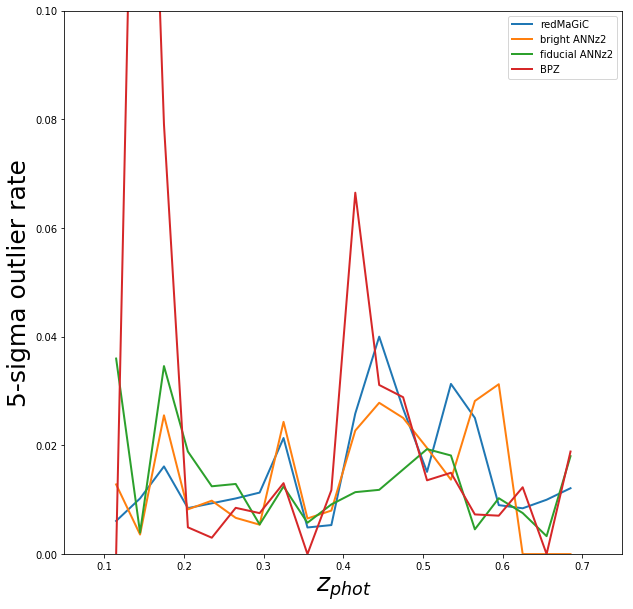

In [177]:
outlier_lum()

In [178]:
def badfraction_lum():
    
   
    nbins = 14

    mask_one = np.where((np.in1d(ID_lum , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_lum_copy = ID_lum[mask_one][arg_one]
    z_spec_matched_to_lum = z_specall[mask_two][arg_two]
    
    
    obins = np.linspace(0.1,0.7, nbins)
    
    zs_all = z_specall[mask_two][arg_two]
    zp_all = z_lum[mask_one][arg_one]
    
    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.04873069576491949 #Thus roughly corresponds to 5sigma 
    print "bad fraction redmagic" , len(mask[mask==True])*1.0/len(mask)

    #######################################################################################################

    mask_one = np.where((np.in1d(bright_z_ID, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zp_all = bright_z_ann[mask_one][arg_one]
    zs_all = z_spec_matched_to_lum[mask_two][arg_two]
    
    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.04873069576491949
    print "bad fraction bright annz" , len(mask[mask==True])*1.0/len(mask)

    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_lum[mask_two][arg_two]
    zp_all = z_ann[mask_one][arg_one]

    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.04873069576491949
    print "bad fraction fiducial annz" , len(mask[mask==True])*1.0/len(mask)

    
    obins = np.linspace(0.1,0.7, nbins)
    rate = []
    err = []
    zs_all = z_spec_matched_to_lum[mask_two][arg_two]
    zp_all = z_bpz[mask_one][arg_one]
    
    ez = np.abs(zs_all - zp_all)/(1+zs_all)
    mask = ez > 0.04873069576491949
    print "bad fraction bpz" , len(mask[mask==True])*1.0/len(mask)
    

    #plt.text( 0.1, 0.045, "Dense sample", fontsize = 20)

    
    return None

In [179]:
badfraction_lum()

bad fraction redmagic 0.017437061494
bad fraction bright annz 0.0119241192412
bad fraction fiducial annz 0.0254849360297
bad fraction bpz 0.0735658274866


In [200]:
def red_bias_scatter_dense():
    plt.figure(figsize = (10,10))
    nbins = 10
    bins = np.linspace(0.11 , 0.7 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_dense_copy = ID_dense[mask_one][arg_one]
    z_spec_matched_to_dense = z_specall[mask_two][arg_two]
    
    
    y2 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)


    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))
    plt.figure(figsize = (10,10))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color = '#FF7F0E',  label = "SMAD redMaGiC")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color = '#FF7F0E', 
             label = "Bias redMaGiC")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    out_mask =  (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    #######################################################################################################
    
    nbins = 8
    bins = np.linspace(0.11 , 0.69 , nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(bright_z_ID, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    y2 = (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])
    z2 = bright_z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = bright_z_ann[mask_one][arg_one]
    print bright_z_ann[mask_one][arg_one].max()
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12)[:-2])

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color = 'g',  label = "SMAD bright ANNZ")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12)[:-2])

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color = 'g', 
             label = "Bias bright ANNZ")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    out_mask =  (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_dense_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_dense_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_dense_copy[mask_two])
    
    y2 = (z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])
    z2 = z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    out_mask =  (z_ann[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color =  '#1F77B4',  label = "SMAD full depth ANNZ")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color =  '#1F77B4', 
             label = "full depth ANNZ")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    
    y2 = (z_bpz[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])
    z2 = z_bpz[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two]
    x2 = z_bpz[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    
    

    
    
    out_mask =  (z_bpz[mask_one][arg_one] - z_spec_matched_to_dense[mask_two][arg_two])/(1+z_spec_matched_to_dense[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color = 'r',  label = "SMAD BPZ")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color = 'r', 
             label = "Bias BPZ")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    
    
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.06,0.06])
    plt.text( 0.1, 0.045, "dense sample", fontsize = 20)

    
    return None

mean bias 0.0013702222038198214
mean scatter 0.015197177840086036
5sigma outlier fraction 0.107866840245
0.6355906725
mean bias 0.0017869049405095417
mean scatter 0.013448036108305
5sigma outlier fraction 0.0667913438418
5sigma outlier fraction 0.226892319137
mean bias 0.007525182578636577
mean scatter 0.018356021551881273
5sigma outlier fraction 0.427747814767
mean bias 0.01632888474854556
mean scatter 0.01994736953414915


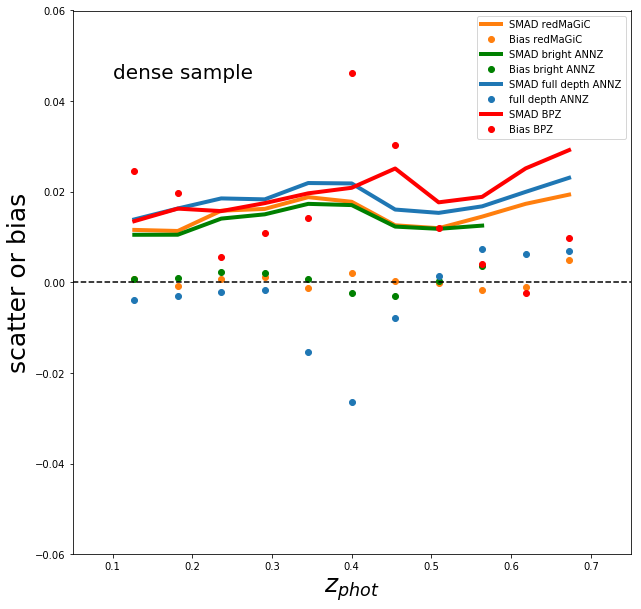

In [201]:
red_bias_scatter_dense()

In [209]:
def red_bias_scatter_lum():
    plt.figure(figsize = (10,10))
    nbins = 10
    bins = np.linspace(0.11 , 0.7 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_lum_copy = ID_dense[mask_one][arg_one]
    z_spec_matched_to_lum = z_specall[mask_two][arg_two]
    
    
    y2 = (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)


    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))
    plt.figure(figsize = (10,10))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color = '#FF7F0E',  label = "SMAD redMaGiC")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color = '#FF7F0E', 
             label = "Bias redMaGiC")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    out_mask =  (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    #######################################################################################################
    
    nbins = 8
    bins = np.linspace(0.11 , 0.69 , nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(bright_z_ID, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    y2 = (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])
    z2 = bright_z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two]
    x2 = bright_z_ann[mask_one][arg_one]
    print bright_z_ann[mask_one][arg_one].max()
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12)[:-2])

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color = 'g',  label = "SMAD bright ANNZ")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12)[:-2])

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color = 'g', 
             label = "Bias bright ANNZ")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    out_mask =  (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    y2 = (z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])
    z2 = z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two]
    x2 = z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    out_mask =  (z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color =  '#1F77B4',  label = "SMAD full depth ANNZ")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color =  '#1F77B4', 
             label = "full depth ANNZ")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    
    y2 = (z_bpz[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])
    z2 = z_bpz[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two]
    x2 = z_bpz[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    
    

    
    
    out_mask =  (z_bpz[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    bin_std, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             y2, 
                                                             statistic=median_absolute_deviation, 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , 1.4826*bin_std , lw = 4, color = 'r',  label = "SMAD BPZ")

    bin_means, bin_edges, binnumber = stats.binned_statistic(x2, 
                                                             z2, 
                                                             statistic='median', 
                                                             bins=np.linspace(0.1,0.7,12))

    plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]) , bin_means , lw = 0, marker = "o", color = 'r', 
             label = "Bias BPZ")
    
    print "mean bias" , np.mean(np.abs(bin_means))
    print "mean scatter" , 1.4826*np.mean(bin_std)
    
    
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.06,0.06])
    plt.text( 0.1, 0.045, "lum sample", fontsize = 20)

    
    return None

mean bias 0.0016525169008753027
mean scatter 0.014670454773222102
5sigma outlier fraction 0.165084605861
0.6240946651
mean bias 0.12059815235481958
mean scatter 0.10653724998550042
5sigma outlier fraction 19.7470420237
5sigma outlier fraction 58.8113908378
mean bias 0.14792172341260168
mean scatter 0.1176290265752051
5sigma outlier fraction 53.8175815105
mean bias 0.1450627236203714
mean scatter 0.11476675283682036


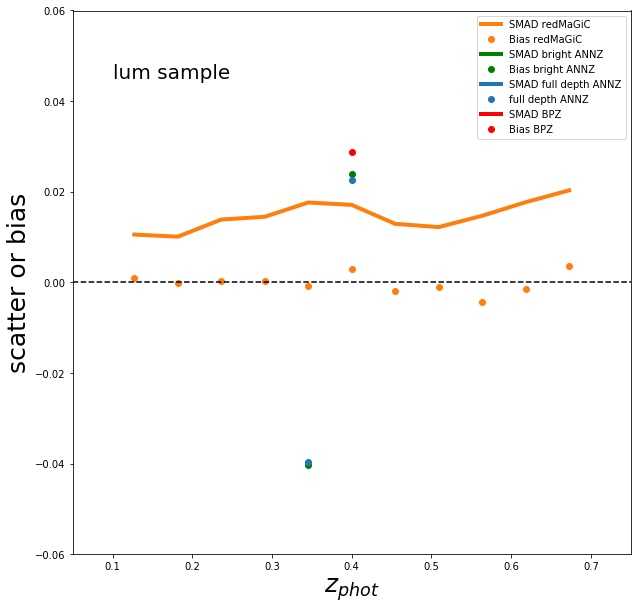

In [210]:
red_bias_scatter_lum()

In [57]:
def red_bias_scatter_lum():
    plt.figure(figsize = (10,10))
    nbins = 8
    bins = np.linspace(0.13 , 0.67 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    ID_lum_copy = ID_lum[mask_one][arg_one]
    z_spec_matched_to_lum = z_specall[mask_two][arg_two]
    
    
    y2 = (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)


    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = '#FF7F0E', label = "SMAD redMaGiC")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = '#FF7F0E', label = "Bias redMaGiC")
    #######################################################################################################
    
    nbins = 8
    bins = np.linspace(0.13 , 0.67 , nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(bright_z_ID, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,bright_z_ID[mask_one])==True))[0]
    arg_one = np.argsort(bright_z_ID[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    y2 = (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])
    z2 = bright_z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two]
    x2 = bright_z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  (bright_z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = "g", label = "SMAD bright ANNz2")
    plt.plot(bins , running_bias2 , lw = 0, color = "g", marker = "o", label = "Bias bright ANNz2")
    
    #######################################################################################################
    mask_one = np.where((np.in1d(ID_kids, ID_lum_copy)==True))[0]
    mask_two = np.where((np.in1d(ID_lum_copy,ID_kids[mask_one])==True))[0]
    arg_one = np.argsort(ID_kids[mask_one])
    arg_two = np.argsort(ID_lum_copy[mask_two])
    
    y2 = (z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_ann[mask_one][arg_one])
    z2 = z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two]
    x2 = z_ann[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  (z_ann[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = '#1F77B4', label = "SMAD fiducial ANNz2")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = '#1F77B4', label = "Bias fiducial ANNz2")
    
    nbins = 8
    bins = np.linspace(0.13 , 0.67 , nbins)
    delta = bins[1]-bins[0]
    
    y2 = (z_bpz[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])
    z2 = z_bpz[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two]
    x2 = z_bpz[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)
    
    
    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    
    print "mean bias" , np.median(np.abs(running_bias2))
    print "mean scatter" , 1.4826*np.median(running_mad2)
    out_mask =  (z_bpz[mask_one][arg_one] - z_spec_matched_to_lum[mask_two][arg_two])/(1+z_spec_matched_to_lum[mask_two][arg_two])>0.08
    print "5sigma outlier fraction" , np.where(out_mask==True)[0].shape[0]*1.0*100/out_mask.shape[0]
    
    
    #plt.plot(bins , running_sigma682 , lw= 4, color = '#1F77B4', label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , 1.4826*np.array(running_mad2) , lw = 4, color = 'red', label = "SMAD BPZ")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", color = 'red', label = "Bias BPZ")
    
    
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{phot}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.06,0.06])
    plt.text( 0.1, 0.045, "Luminous sample", fontsize = 20)

    
    return None

In [58]:
levels = [0.68, 0.95]
def lum_color_inspec():
    
    mask_one = np.where((np.in1d(ID_lum, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    x = colors_lum#[mask_one][arg_one]
    y = colors_spec[mask_two][arg_two]
    
    plt.figure(figsize=(10,10))
    thick_line1 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="luminous sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="luminous sample")
    for i in range (1,12):
        
       mask_all = (z_lum[mask_one][arg_one] <0.12+i*0.05)&(z_lum[mask_one][arg_one] >0.1+i*0.05)
       mask_lum = (z_lum<0.12+i*0.05)&(z_lum>0.1+i*0.05)
       
       print 0.11+i*0.05
       corner.hist2d(x[mask_lum,1] , x[mask_lum,2], color='#FF7F0E', plot_datapoints=False,
                 bins=30, levels=levels, fill_contours=True, smooth=5.0, label = "luminous sample with spec-z")
       corner.hist2d(y[mask_all,1] , y[mask_all,2], color='#1F77B4',plot_datapoints=False,
                 bins=30, levels=levels, fill_contours=True, smooth=5.0, label = "luminous sample")
    
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    plt.xlim((1,2.2))
    plt.ylim(0.2,1.5)
    plt.xlabel("$g-r$" , fontsize = 20)
    plt.ylabel("$r-i$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

0.16
0.21
0.26
0.31
0.36
0.41
0.46
0.51
0.56
0.61
0.66


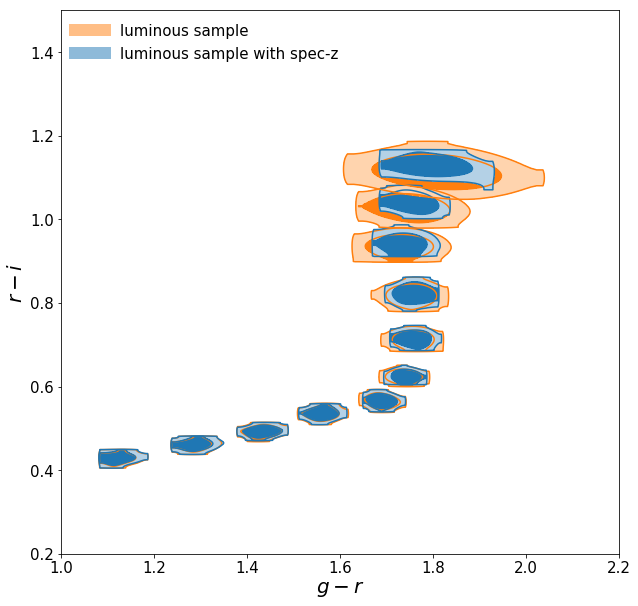

In [59]:
lum_color_inspec()

In [60]:
levels = [0.68, 0.95]
def lum_color_inspec2():
    
    mask_one = np.where((np.in1d(ID_lum, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    x = colors_lum#[mask_one][arg_one]
    y = colors_spec[mask_two][arg_two]
    
    plt.figure(figsize=(10,10))
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="luminous sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="luminous sample")
    for i in range (1,12):
        
       mask_all = (z_lum[mask_one][arg_one] <0.12+i*0.05)&(z_lum[mask_one][arg_one] >0.1+i*0.05)
       mask_lum = (z_lum<0.12+i*0.05)&(z_lum>0.1+i*0.05)&(mi_lum<np.max(mi_spec[mask_two][arg_two][mask_all]))
       
       print 0.11+i*0.05
       corner.hist2d(x[mask_lum,1] , x[mask_lum,2], color='#FF7F0E', plot_datapoints=False,
                 bins=30, levels=levels, fill_contours=True, smooth=5.0, label = "luminous sample with spec-z")
       corner.hist2d(y[mask_all,1] , y[mask_all,2], color='#1F77B4',plot_datapoints=False,
                 bins=30, levels=levels, fill_contours=True, smooth=5.0, label = "luminous sample")
    
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    plt.xlim((1,2.2))
    plt.ylim(0.2,1.5)
    plt.xlabel("$g-r$" , fontsize = 20)
    plt.ylabel("$r-i$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

0.16
0.21
0.26
0.31
0.36
0.41
0.46
0.51
0.56
0.61
0.66


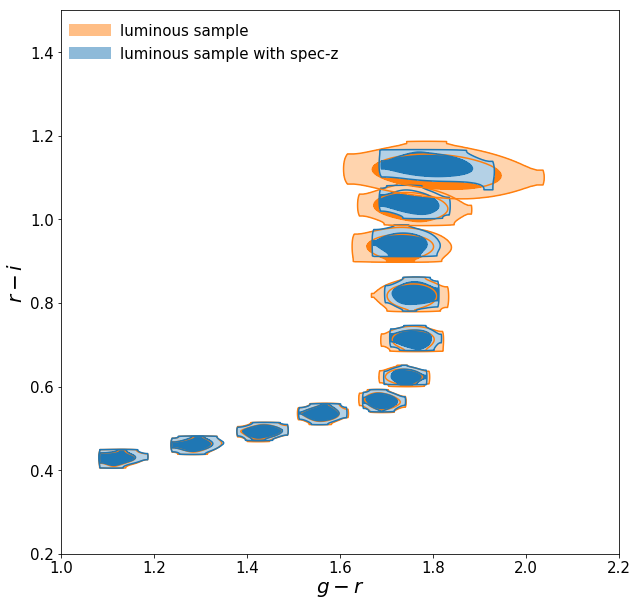

In [61]:
lum_color_inspec2()

In [62]:
levels = [0.68, 0.95]
def dense_color_inspec():
    
    mask_one = np.where((np.in1d(ID_dense, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    x = colors_dense#[mask_one][arg_one]
    y = colors_spec[mask_two][arg_two]
    
    plt.figure(figsize=(10,10))
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="dense sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="dense sample")
    for i in range (1,12):
        
       mask_all = (z_dense[mask_one][arg_one] <0.12+i*0.05)&(z_dense[mask_one][arg_one] >0.1+i*0.05)
       mask_lum = (z_dense<0.12+i*0.05)&(z_dense>0.1+i*0.05)
       
       print 0.11+i*0.05
       corner.hist2d(x[mask_lum,1] , x[mask_lum,2], color='#FF7F0E', plot_datapoints=False,
                 bins=50, levels=levels, fill_contours=True, smooth=4.0, label = "luminous sample with spec-z")
       corner.hist2d(y[mask_all,1] , y[mask_all,2], color='#1F77B4',plot_datapoints=False,
                 bins=50, levels=levels, fill_contours=True, smooth=4.0, label = "luminous sample")
    
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    plt.xlim((1,2.2))
    plt.ylim(0.2,1.5)
    plt.xlabel("$g-r$" , fontsize = 20)
    plt.ylabel("$r-i$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

0.16
0.21
0.26
0.31
0.36
0.41
0.46
0.51
0.56
0.61
0.66


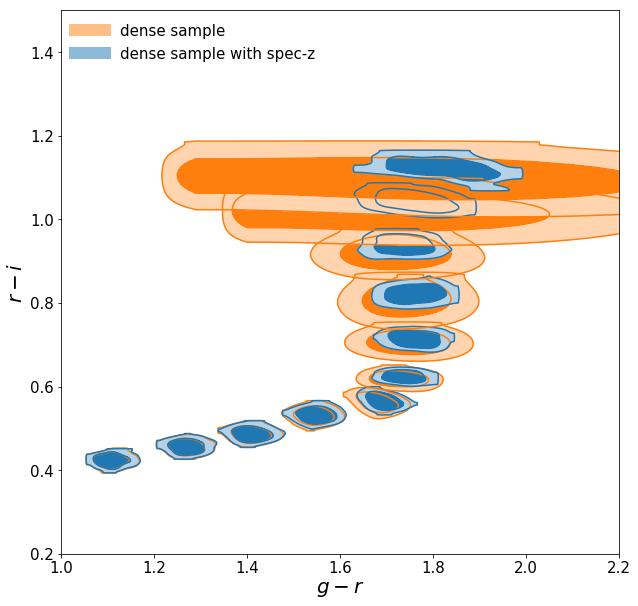

In [63]:
dense_color_inspec()

In [64]:
levels = [0.68, 0.95]
def dense_color_inspec2():
    
    mask_one = np.where((np.in1d(ID_dense, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    x = colors_dense#[mask_one][arg_one]
    y = colors_spec[mask_two][arg_two]
    
    plt.figure(figsize=(10,10))
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="dense sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="dense sample")
    for i in range (1,12):
        
       mask_all = (z_dense[mask_one][arg_one] <0.12+i*0.05)&(z_dense[mask_one][arg_one] >0.1+i*0.05)
       mask_lum = (z_dense<0.12+i*0.05)&(z_dense>0.1+i*0.05)&(mi_dense<np.max(mi_spec[mask_two][arg_two][mask_all]))
       
       print 0.11+i*0.05
       corner.hist2d(x[mask_lum,1] , x[mask_lum,2], color='#FF7F0E', plot_datapoints=False,
                 bins=60, levels=levels, fill_contours=True, smooth=4.0, label = "luminous sample with spec-z")
       corner.hist2d(y[mask_all,1] , y[mask_all,2], color='#1F77B4',plot_datapoints=False,
                 bins=60, levels=levels, fill_contours=True, smooth=4.0, label = "luminous sample")
    
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    plt.xlim((1,2.2))
    plt.ylim(0.2,1.5)
    plt.xlabel("$g-r$" , fontsize = 20)
    plt.ylabel("$r-i$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

0.16
0.21
0.26
0.31
0.36
0.41
0.46
0.51
0.56
0.61
0.66


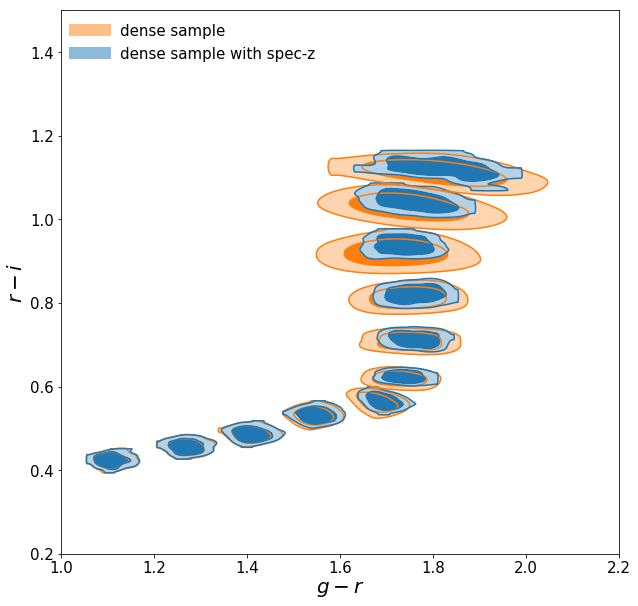

In [65]:
dense_color_inspec2()

In [37]:
import pandas as pd
df=pd.read_csv("KiDS_DR3_tile_table.csv", sep=',')

In [38]:
mask = df.values[:,3] == 'g'
gtiles = df.values[mask]
mask = df.values[:,3] == 'r'
rtiles = df.values[mask]
mask = df.values[:,3] == 'i'
itiles = df.values[mask]

In [39]:
print "RA and DEC range of each tile is 62.3 × 66.8 arcminutes"

RA and DEC range of each tile is 62.3 × 66.8 arcminutes


In [40]:
df

,'ID',RA,DEC,BAND,DATA,FWHM,ELL,MAG_LIM,COMP,GAIN,GRADE
0,KIDS_43.7_-30.2,43.706,-30.170,g,2014-12-21 03:51:18,1.10,0.03,25.28,24.04,1.714885e+13,B
1,KIDS_52.3_-33.1,52.277,-33.137,r,2012-11-18 05:56:55,0.71,0.05,25.00,23.99,2.901113e+13,C
2,KIDS_332.0_-31.2,332.039,-31.159,u,2014-10-24 01:08:59,1.05,0.04,24.10,22.95,3.208289e+12,B
3,KIDS_45.1_-33.1,45.149,-33.137,u,2012-11-08 05:28:19,0.99,0.03,24.21,23.05,3.413183e+12,B
4,KIDS_218.0_-0.5,218.000,-0.500,g,2015-04-14 06:55:15,1.01,0.06,24.87,23.73,1.599688e+13,A
5,KIDS_344.9_-31.2,344.854,-31.159,i,2011-11-10 03:04:29,1.05,0.04,23.41,22.17,1.341007e+13,B
6,KIDS_217.0_1.5,217.000,1.489,g,2015-05-13 05:35:02,0.69,0.05,24.99,23.98,1.561299e+13,A
7,KIDS_218.0_-0.5,218.000,-0.500,i,2013-03-24 06:11:03,0.62,0.06,23.84,23.01,1.348851e+13,B
8,KIDS_180.5_-2.5,180.501,-2.478,g,2014-04-19 00:44:59,0.90,0.04,25.11,24.00,1.705474e+13,B
9,KIDS_173.0_-0.5,173.000,-0.500,r,2013-04-09 04:18:26,0.61,0.05,24.89,23.97,3.168680e+13,A


In [81]:
def value_added_coordinate(ra , dec):
    
    mask_r = (ra>rtiles[:,1]-62.3/120)&(ra<rtiles[:,1]+62.3/120)&(dec>rtiles[:,2]-66.8/120)&(dec<rtiles[:,2]+66.8/120)
    fwhm_r , maglim_r , comp_r = rtiles[mask_r,5] , rtiles[mask_r,7], rtiles[mask_r,8]
    if len(mask_r[mask_r==True])<1:
        fwhm_r, maglim_r, comp_r = 1000, 1000, 1000
    
    mask_g=(ra>gtiles[:,1]-62.3/120)&(ra<gtiles[:,1]+62.3/120)&(dec>gtiles[:,2]-66.8/120)&(dec<gtiles[:,2]+66.8/120)
    fwhm_g , maglim_g , comp_g = gtiles[mask_g,5] , gtiles[mask_g,7], gtiles[mask_g,8]
    if len(mask_g[mask_g==True])<1:
        fwhm_g, maglim_g, comp_g = 1000, 1000, 1000
    
    mask_i=(ra>itiles[:,1]-62.3/120)&(ra<itiles[:,1]+62.3/120)&(dec>itiles[:,2]-66.8/120)&(dec<itiles[:,2]+66.8/120)
    fwhm_i , maglim_i , comp_i = itiles[mask_i,5] , itiles[mask_i,7], itiles[mask_i,8]
    if len(mask_i[mask_i==True])<1:
        fwhm_i, maglim_i, comp_i = 1000, 1000, 1000
    
    return np.array([np.mean(fwhm_g) , np.mean(fwhm_r), np.mean(fwhm_i) \
           , np.mean(maglim_g), np.mean(maglim_r), np.mean(maglim_i) \
           , np.mean(comp_g), np.mean(comp_g), np.mean(comp_i)])   

In [61]:
mask_one = np.where((np.in1d(ID_kids , ID_lum)==True))[0]
mask_two = np.where((np.in1d(ID_lum  , ID_kids[mask_one])==True))[0]
    
arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_lum[mask_two])
kRA_lum = RA[mask_one][arg_one]
kDEC_lum = DEC[mask_one][arg_one]
kID_lum = ID_lum[mask_two][arg_two]
kz_lum = z_lum[mask_two][arg_two]

In [43]:
mask_one = np.where((np.in1d(ID_kids , ID_dense)==True))[0]
mask_two = np.where((np.in1d(ID_dense  , ID_kids[mask_one])==True))[0]
    
arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_dense[mask_two])
kRA_dense = RA[mask_one][arg_one]
kDEC_dense = DEC[mask_one][arg_one]
kID_dense = ID_dense[mask_two][arg_two]
kz_dense = z_dense[mask_two][arg_two]

In [82]:
def value_added_dense():
    
    values = []
    for i in range(len(kz_dense)):
        values.append(value_added_coordinate(kRA_dense[i], kDEC_dense[i]))
        
    return np.array(values)

def value_added_lum():
    
    values = []
    for i in range(len(kz_lum)):
        values.append(value_added_coordinate(kRA_lum[i], kDEC_lum[i]))
        
    return np.array(values)

In [83]:
sys_lum = value_added_lum()

In [84]:
sys_dense = value_added_dense()

In [91]:
kz_dense = kz_dense[sys_dense[:,0]<1000.]
kID_dense = kID_dense[sys_dense[:,0]<1000.]
sys_dense = sys_dense[sys_dense[:,0]<1000.]

In [90]:
kz_lum = kz_lum[sys_lum[:,0]<1000.]
kID_lum = kID_lum[sys_lum[:,0]<1000.]
sys_lum = sys_lum[sys_lum[:,0]<1000.]

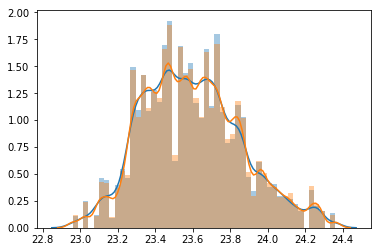

In [139]:
sns.distplot(sys_lum[:,5])
sns.distplot(sys_dense[:,5])

In [181]:
def bias_dense_FWHM():
    
    fig , ax = plt.subplots(nrows=1,ncols=3 , figsize=(15,5))
    
    mask_one = np.where((np.in1d(kID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,kID_dense[mask_one])==True))[0]
    arg_one = np.argsort(kID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    y2 = (kz_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = kz_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    
    ########## FWHM g ###############
    
    nbins = 10
    bins = np.linspace(0.62 , 1.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,0][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[0].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[0].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[0].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[0].set_xlabel(r"$g\;\mathrm{PSF \; FWHM} \; \;(\mathrm{arcsec}) $" , fontsize= 15)
    ax[0].set_ylabel("scatter or bias" , fontsize= 25)
    ax[0].legend(loc = 'best' , fontsize = 10)


    ax[0].set_ylim([-0.01,0.02])
    ########## FWHM r ###############
    
    nbins = 10
    bins = np.linspace(0.52 , 0.98 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,1][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[1].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[1].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[1].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[1].set_xlabel(r"$r\;\mathrm{PSF \; FWHM} \; \;(\mathrm{arcsec}) $" , fontsize= 15)
    ax[1].set_ylim([-0.01,0.02])

    ########## FWHM g ###############
    
    nbins = 10
    bins = np.linspace(0.58 , 1.18 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,2][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[2].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[2].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[2].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[2].set_xlabel(r"$i\;\mathrm{PSF \; FWHM} \; \;(\mathrm{arcsec}) $" , fontsize= 15)
    ax[2].set_ylim([-0.01,0.02])

    plt.tight_layout()
    plt.savefig("/home/vakili/public_html/systematics/error_psf.png")
    return None

def bias_lum_FWHM():
    
    fig , ax = plt.subplots(nrows=1,ncols=3 , figsize=(15,5))
    
    mask_one = np.where((np.in1d(kID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,kID_lum[mask_one])==True))[0]
    arg_one = np.argsort(kID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    y2 = (kz_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = kz_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    
    ########## FWHM g ###############
    
    nbins = 10
    bins = np.linspace(0.62 , 1.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_lum[:,0][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[0].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[0].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[0].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[0].set_xlabel(r"$g\;\mathrm{PSF \; FWHM} \; \;(\mathrm{arcsec}) $" , fontsize= 15)
    ax[0].set_ylabel("scatter or bias" , fontsize= 25)
    ax[0].legend(loc = 'best' , fontsize = 10)
    ax[0].set_ylim([-0.01,0.02])

    ########## FWHM r ###############
    
    nbins = 10
    bins = np.linspace(0.52 , 0.98 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_lum[:,1][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[1].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[1].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[1].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[1].set_xlabel(r"$r\;\mathrm{PSF \; FWHM} \; \;(\mathrm{arcsec}) $" , fontsize= 15)
    ax[1].set_ylim([-0.01,0.02])

    ########## FWHM g ###############
    
    nbins = 10
    bins = np.linspace(0.58 , 1.18 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_lum[:,2][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[2].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[2].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[2].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[2].set_xlabel(r"$i\;\mathrm{PSF \; FWHM} \; \;(\mathrm{arcsec}) $" , fontsize= 15)
    ax[2].set_ylim([-0.01,0.02])

    plt.tight_layout()

    
    return None

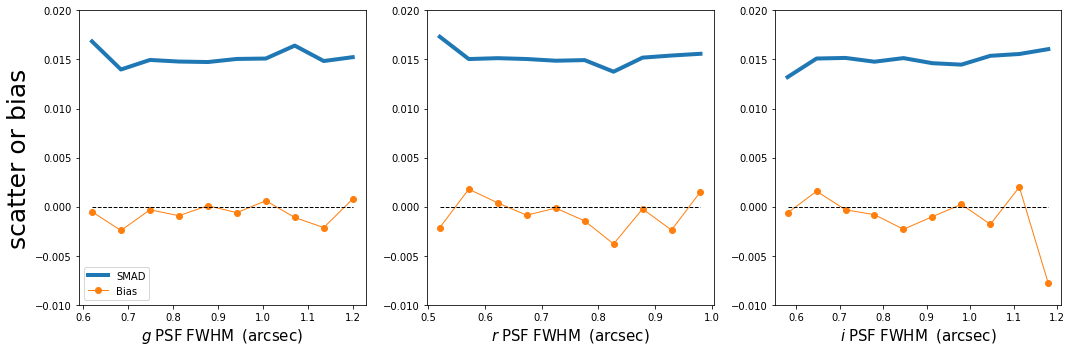

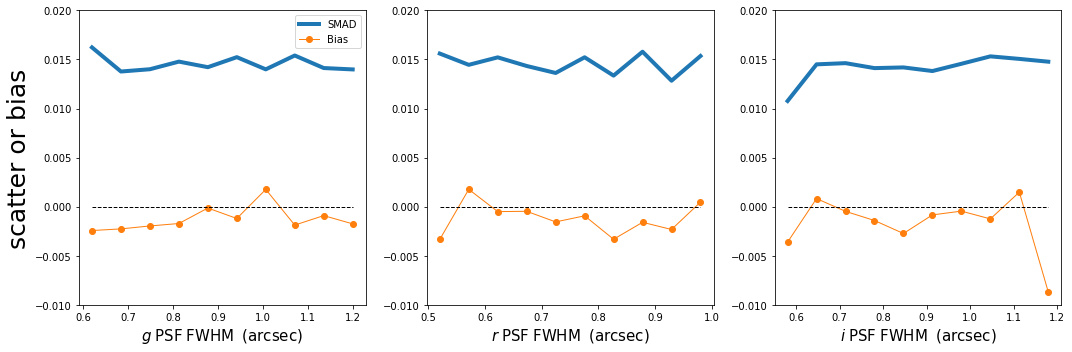

In [182]:
bias_dense_FWHM()
bias_lum_FWHM()

In [183]:
def bias_dense_maglim():
    
    fig , ax = plt.subplots(nrows=1,ncols=3 , figsize=(15,5))
    
    mask_one = np.where((np.in1d(kID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,kID_dense[mask_one])==True))[0]
    arg_one = np.argsort(kID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    y2 = (kz_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = kz_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    
    ########## maglim g ###############
    
    nbins = 10
    bins = np.linspace(24.6 , 25.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,3][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[0].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[0].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[0].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[0].set_xlabel(r"$g\;\mathrm{mag \; lim}$" , fontsize= 15)
    ax[0].set_ylabel("scatter or bias" , fontsize= 25)
    ax[0].legend(loc = 'best' , fontsize = 10)


    ax[0].set_ylim([-0.01,0.02])
    ########## maglim r ###############
    
    nbins = 10
    bins = np.linspace(24.8 , 25.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,4][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[1].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[1].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[1].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[1].set_xlabel(r"$r\;\mathrm{mag \; lim}$" , fontsize= 15)
    ax[1].set_ylim([-0.01,0.02])

    ########## maglim g ###############
    
    nbins = 10
    bins = np.linspace(23.2 , 24.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,5][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[2].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[2].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[2].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[2].set_xlabel(r"$i\;\mathrm{mag \; lim}$" , fontsize= 15)
    ax[2].set_ylim([-0.01,0.02])

    plt.tight_layout()
    plt.savefig("/home/vakili/public_html/systematics/error_maglim.png")

    return None

def bias_lum_maglim():
    
    fig , ax = plt.subplots(nrows=1,ncols=3 , figsize=(15,5))
    
    mask_one = np.where((np.in1d(kID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,kID_lum[mask_one])==True))[0]
    arg_one = np.argsort(kID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    y2 = (kz_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = kz_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    
    ########## maglim g ###############
    
    nbins = 10
    bins = np.linspace(24.9 , 25.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,3][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[0].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[0].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[0].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[0].set_xlabel(r"$g\;\mathrm{mag \; lim}$" , fontsize= 15)
    ax[0].set_ylabel("scatter or bias" , fontsize= 25)
    ax[0].legend(loc = 'best' , fontsize = 10)


    ax[0].set_ylim([-0.01,0.02])
    ########## maglim r ###############
    
    nbins = 10
    bins = np.linspace(24.8 , 25.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,4][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[1].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[1].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[1].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[1].set_xlabel(r"$r\;\mathrm{mag \; lim}$" , fontsize= 15)
    ax[1].set_ylim([-0.01,0.02])

    ########## maglim g ###############
    
    nbins = 10
    bins = np.linspace(23.2 , 24.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,5][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[2].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[2].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[2].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[2].set_xlabel(r"$i\;\mathrm{mag \; lim}$" , fontsize= 15)
    ax[2].set_ylim([-0.01,0.02])

    plt.tight_layout()
    
    return None

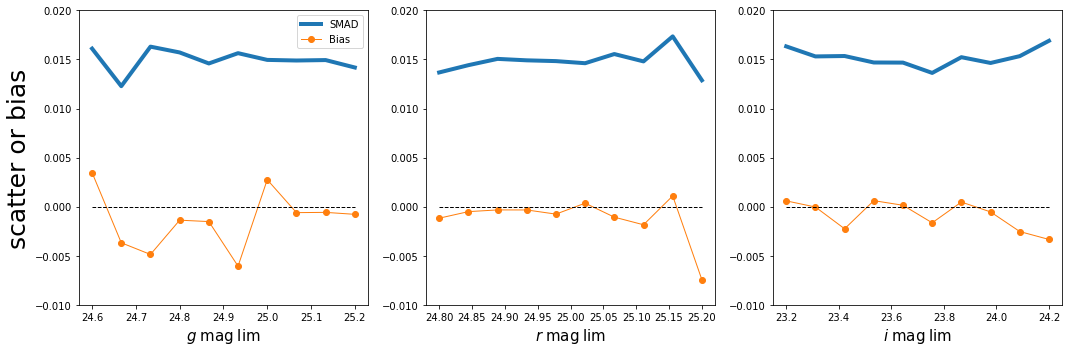

In [184]:
bias_dense_maglim()
#bias_lum_maglim()

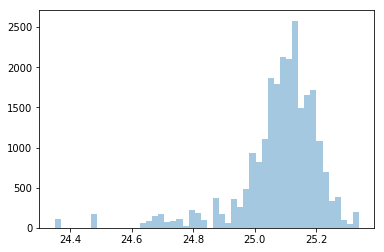

In [170]:
sns.distplot(sys_lum[:,3], kde=False)

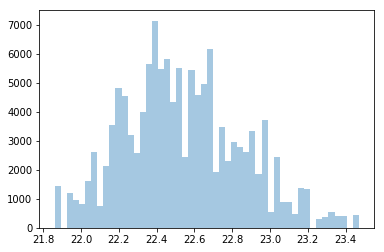

In [177]:
sns.distplot(sys_dense[:,8], kde=False)

In [185]:
def bias_dense_comp():
    
    fig , ax = plt.subplots(nrows=1,ncols=3 , figsize=(15,5))
    
    mask_one = np.where((np.in1d(kID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,kID_dense[mask_one])==True))[0]
    arg_one = np.argsort(kID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    y2 = (kz_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = kz_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    
    ########## comp g ###############
    
    nbins = 10
    bins = np.linspace(23.8 , 24.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,6][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[0].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[0].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[0].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[0].set_xlabel(r"$g\; 98\% \; \mathrm{completeness mag}$" , fontsize= 15)
    ax[0].set_ylabel("scatter or bias" , fontsize= 25)
    ax[0].legend(loc = 'best' , fontsize = 10)


    ax[0].set_ylim([-0.01,0.02])
    ########## maglim r ###############
    
    nbins = 10
    bins = np.linspace(23.8 , 24.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,7][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[1].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[1].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[1].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[1].set_xlabel(r"$r\; 98\% \; \mathrm{completeness mag}$" , fontsize= 15)
    ax[1].set_ylim([-0.01,0.02])

    ########## maglim g ###############
    
    nbins = 10
    bins = np.linspace(22.2 , 23.0 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,8][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[2].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[2].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[2].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[2].set_xlabel(r"$i\; 98\% \; \mathrm{completeness mag}$" , fontsize= 15)
    ax[2].set_ylim([-0.01,0.02])

    plt.tight_layout()
    plt.savefig("/home/vakili/public_html/systematics/error_comp.png")

    return None

def bias_lum_comp():
    
    fig , ax = plt.subplots(nrows=1,ncols=3 , figsize=(15,5))
    
    mask_one = np.where((np.in1d(kID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,kID_lum[mask_one])==True))[0]
    arg_one = np.argsort(kID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    y2 = (kz_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_specall[mask_two][arg_two])
    z2 = kz_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    
    ########## comp g ###############
    
    nbins = 10
    bins = np.linspace(23.8 , 24.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,6][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[0].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[0].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[0].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[0].set_xlabel(r"$g\; 98\% \; \mathrm{completeness mag}$" , fontsize= 15)
    ax[0].set_ylabel("scatter or bias" , fontsize= 25)
    ax[0].legend(loc = 'best' , fontsize = 10)


    ax[0].set_ylim([-0.01,0.02])
    ########## maglim r ###############
    
    nbins = 10
    bins = np.linspace(23.8 , 24.2 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,7][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[1].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[1].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[1].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[1].set_xlabel(r"$r\; 98\% \; \mathrm{completeness mag}$" , fontsize= 15)
    ax[1].set_ylim([-0.01,0.02])

    ########## maglim g ###############
    
    nbins = 10
    bins = np.linspace(22.2 , 23.0 , nbins)
    delta = bins[1]-bins[0]
    x2 = sys_dense[:,8][mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
   
    ax[2].plot(bins , 1.4826*np.array(running_mad2) , lw = 4, label = "SMAD")
    ax[2].plot(bins , running_bias2 , lw = 1, marker = "o", label = "Bias")
    ax[2].plot(bins, bins*0.0 , "k--", lw = 1)
    ax[2].set_xlabel(r"$i\; 98\% \; \mathrm{completeness mag}$" , fontsize= 15)
    ax[2].set_ylim([-0.01,0.02])

    plt.tight_layout()
    
    return None

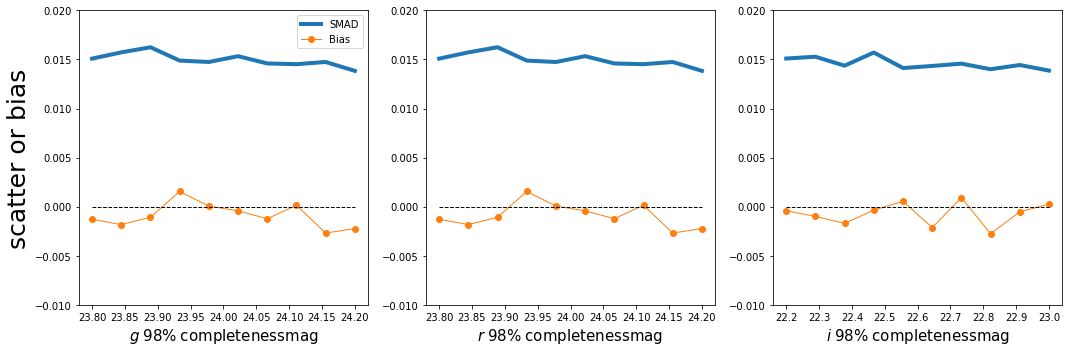

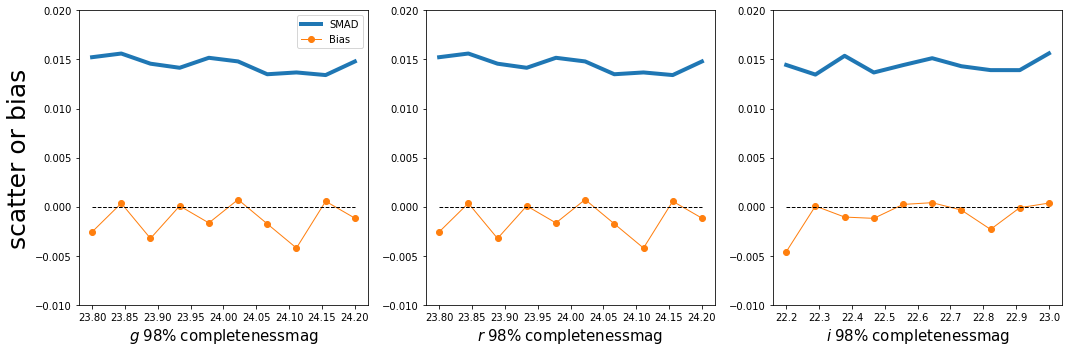

In [186]:
bias_dense_comp()
bias_lum_comp()